In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split 
from sklearn.inspection import permutation_importance

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
def read_large_file(file_object):
#     i = 0
    while True:
        data = file_object.readline()
        if not data:
            break
        yield data

In [6]:
df1 = pd.read_csv('HJ17 2023.csv')
df1.shape

(888211, 14)

In [7]:
df2 = pd.read_csv('HJ17 202201.csv')
df2.shape

(652320, 14)

In [8]:
df3 = pd.read_csv('HJ17 202206.csv')
df3.shape

(924480, 14)

In [9]:
all_df = pd.concat([df2, df3, df1], ignore_index=True)
all_df.shape

(2465011, 14)

In [10]:
all_df

,Unnamed: 0,HJ17引取扭力PV值,HJ17引取速度PV值,HJ17水槽真空度PV值,HJ17水槽溫度PV值,HJ17水槽溫度SV值,HJ17主機扭力PV值,HJ17主機速度PV值,HJ17供料扭力PV值,HJ17供料速度PV值,HJ17真空度PV值,HJ17秤重%PV,HJ17單管秤重PV_F,HJ17單管設重SV
0,01-Jan-22 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01-Jan-22 00:00:20,0,0,0,0,0,0,0,0,0,0,0,0,0
2,01-Jan-22 00:00:40,0,0,0,0,0,0,0,0,0,0,0,0,0
3,01-Jan-22 00:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0
4,01-Jan-22 00:01:20,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465006,25-Jul-23 14:28:40,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0
2465007,25-Jul-23 14:29:00,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0
2465008,25-Jul-23 14:29:20,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0
2465009,25-Jul-23 14:29:40,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0


# 數據處理

In [11]:
all_df.columns

Index(['Unnamed: 0', 'HJ17引取扭力PV值', 'HJ17引取速度PV值', 'HJ17水槽真空度PV值',
       'HJ17水槽溫度PV值 ', 'HJ17水槽溫度SV值', 'HJ17主機扭力PV值', 'HJ17主機速度PV值',
       'HJ17供料扭力PV值', 'HJ17供料速度PV值', 'HJ17真空度PV值', 'HJ17秤重%PV', 'HJ17單管秤重PV_F',
       'HJ17單管設重SV'],
      dtype='object')

In [12]:
all_df.shape

(2465011, 14)

In [13]:
# df = all_df.drop(['Unnamed: 0', 'HJ17水槽溫度SV值'], axis=1)
df = all_df.drop(['HJ17水槽溫度SV值'], axis=1)
df.shape

(2465011, 13)

In [14]:
df.describe()

,Unnamed: 0,HJ17引取扭力PV值,HJ17引取速度PV值,HJ17水槽真空度PV值,HJ17水槽溫度PV值,HJ17主機扭力PV值,HJ17主機速度PV值,HJ17供料扭力PV值,HJ17供料速度PV值,HJ17真空度PV值,HJ17秤重%PV,HJ17單管秤重PV_F,HJ17單管設重SV
count,2465011,2465011,2465011,2465011,2465011,2465011,2465011,2465011,2465011,2465011,2465011,2465011,2465011
unique,2465011,463,598,902,313,643,257,259,320,1729,2007,1609,18
top,01-Jan-22 00:00:00,0,0,0,0,0,43.09999847,0,0,0,0,0,4437
freq,1,271302,268595,268918,253434,268922,458157,269613,270190,270467,287563,270663,953417


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465011 entries, 0 to 2465010
Data columns (total 13 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Unnamed: 0    object
 1   HJ17引取扭力PV值   object
 2   HJ17引取速度PV值   object
 3   HJ17水槽真空度PV值  object
 4   HJ17水槽溫度PV值   object
 5   HJ17主機扭力PV值   object
 6   HJ17主機速度PV值   object
 7   HJ17供料扭力PV值   object
 8   HJ17供料速度PV值   object
 9   HJ17真空度PV值    object
 10  HJ17秤重%PV     object
 11  HJ17單管秤重PV_F  object
 12  HJ17單管設重SV    object
dtypes: object(13)
memory usage: 244.5+ MB


In [16]:
for i in df.columns:
    print(i, ':', len(df[i].unique()))

Unnamed: 0 : 2465011
HJ17引取扭力PV值 : 463
HJ17引取速度PV值 : 598
HJ17水槽真空度PV值 : 902
HJ17水槽溫度PV值  : 313
HJ17主機扭力PV值 : 643
HJ17主機速度PV值 : 257
HJ17供料扭力PV值 : 259
HJ17供料速度PV值 : 320
HJ17真空度PV值 : 1729
HJ17秤重%PV : 2007
HJ17單管秤重PV_F : 1609
HJ17單管設重SV : 18


In [17]:
# 將目標值替換為 NaN
# df = df.replace(['I/O Timeout', 'Comm Fail', 'Not Connect', 'Bad', '0'], np.nan)
df['HJ17單管秤重PV_F'] = df['HJ17單管秤重PV_F'].replace(['I/O Timeout', 'Comm Fail', 'Not Connect', 'Bad', '0', 0], np.nan)
df['HJ17單管設重SV'] = df['HJ17單管設重SV'].replace(['I/O Timeout', 'Comm Fail', 'Not Connect', 'Bad', '0', 0], np.nan)
df['HJ17秤重%PV'] = df['HJ17秤重%PV'].replace(['I/O Timeout', 'Comm Fail', 'Not Connect', 'Bad', '0', 0], np.nan)
df = df.replace(['I/O Timeout', 'Comm Fail', 'Not Connect', 'Bad'], np.nan)

In [18]:
df_nona = df.dropna()
df.shape, df_nona.shape

((2465011, 13), (1911828, 13))

In [19]:
for i in df_nona.columns:
    print(i, ':', df_nona[i].unique())

Unnamed: 0 : ['21-Jan-22 10:37:00' '21-Jan-22 10:37:20' '21-Jan-22 10:37:40' ...
 '25-Jul-23 00:27:00' '25-Jul-23 00:27:20' '25-Jul-23 00:27:40']
HJ17引取扭力PV值 : ['64.69999695' '64.59999847' '64.40000153' '64.30000305' '64.19999695'
 '64' '64.09999847' '63.70000076' '63.59999847' '63.5' '63.20000076'
 '63.09999847' '63' '62.79999924' '62.90000153' '62.70000076'
 '62.59999847' '62.29999924' '62.5' '62.40000153' '62.20000076'
 '62.09999847' '62' '61.90000153' '61.79999924' '61.59999847'
 '61.70000076' '61.40000153' '61.5' '61.29999924' '61.09999847'
 '61.20000076' '60.90000153' '60.79999924' '61' '60.70000076' '60.5'
 '60.59999847' '60.40000153' '60.29999924' '60' '60.20000076'
 '60.09999847' '59.90000153' '59.79999924' '59.70000076' '59.59999847'
 '59.5' '59.40000153' '59.29999924' '59.09999847' '59.20000076' '59'
 '58.90000153' '58.79999924' '58.70000076' '58.59999847' '58.5'
 '58.40000153' '58.29999924' '58.20000076' '58.09999847' '58'
 '57.90000153' '57.70000076' '56.79999924' '56.9000

In [55]:
df_nona['HJ17單管設重SV'].unique()

array(['4437', 4437, '7874', 7874, '4439', 4439, '6750', 6749, 7900, 7899,
       7910, 7940, 7980], dtype=object)

In [57]:
df_nona.columns

Index(['Unnamed: 0', 'HJ17引取扭力PV值', 'HJ17引取速度PV值', 'HJ17水槽真空度PV值',
       'HJ17水槽溫度PV值 ', 'HJ17主機扭力PV值', 'HJ17主機速度PV值', 'HJ17供料扭力PV值',
       'HJ17供料速度PV值', 'HJ17真空度PV值', 'HJ17秤重%PV', 'HJ17單管秤重PV_F', 'HJ17單管設重SV'],
      dtype='object')

In [56]:
df_nona.dtypes

Unnamed: 0      object
HJ17引取扭力PV值     object
HJ17引取速度PV值     object
HJ17水槽真空度PV值    object
HJ17水槽溫度PV值     object
HJ17主機扭力PV值     object
HJ17主機速度PV值     object
HJ17供料扭力PV值     object
HJ17供料速度PV值     object
HJ17真空度PV值      object
HJ17秤重%PV       object
HJ17單管秤重PV_F    object
HJ17單管設重SV      object
dtype: object

In [20]:
# 将'Unnamed: 0'列转换为datetime类型
df_nona['Unnamed: 0'] = pd.to_datetime(df_nona['Unnamed: 0'])

# 将其他列转换为float类型
float_columns = df_nona.columns.difference(['Unnamed: 0'])
df_nona[float_columns] = df_nona[float_columns].astype(float)

df_nona.dtypes

Unnamed: 0      datetime64[ns]
HJ17引取扭力PV值            float64
HJ17引取速度PV值            float64
HJ17水槽真空度PV值           float64
HJ17水槽溫度PV值            float64
HJ17主機扭力PV值            float64
HJ17主機速度PV值            float64
HJ17供料扭力PV值            float64
HJ17供料速度PV值            float64
HJ17真空度PV值             float64
HJ17秤重%PV              float64
HJ17單管秤重PV_F           float64
HJ17單管設重SV             float64
dtype: object

In [21]:
new_columns = {'Unnamed: 0': 'Date'}
df_nona.rename(columns=new_columns, inplace=True)

df_nona.head(2)

,Date,HJ17引取扭力PV值,HJ17引取速度PV值,HJ17水槽真空度PV值,HJ17水槽溫度PV值,HJ17主機扭力PV值,HJ17主機速度PV值,HJ17供料扭力PV值,HJ17供料速度PV值,HJ17真空度PV值,HJ17秤重%PV,HJ17單管秤重PV_F,HJ17單管設重SV
88311,2022-01-21 10:37:00,64.699997,888.0,196.0,26.700001,55.400002,42.700001,56.000000,26.5,699.0,104.830002,4430.0,4437.0
88312,2022-01-21 10:37:20,64.599998,891.0,195.0,26.700001,55.500000,42.599998,55.900002,26.4,697.0,104.830002,4430.0,4437.0


In [59]:
# for i in df.columns:
#     df[i] = df[i].astype(float)
# df_nona = df_nona[HJ17引取扭力PV值 :].astype(float)
# df_nona.dtypes

ValueError: could not convert string to float: '21-Jan-22 10:37:20'

In [22]:
df_nona

,Date,HJ17引取扭力PV值,HJ17引取速度PV值,HJ17水槽真空度PV值,HJ17水槽溫度PV值,HJ17主機扭力PV值,HJ17主機速度PV值,HJ17供料扭力PV值,HJ17供料速度PV值,HJ17真空度PV值,HJ17秤重%PV,HJ17單管秤重PV_F,HJ17單管設重SV
88311,2022-01-21 10:37:00,64.699997,888.0,196.0,26.700001,55.400002,42.700001,56.000000,26.5,699.0,104.830002,4430.0,4437.0
88312,2022-01-21 10:37:20,64.599998,891.0,195.0,26.700001,55.500000,42.599998,55.900002,26.4,697.0,104.830002,4430.0,4437.0
88313,2022-01-21 10:37:40,64.599998,892.0,195.0,27.000000,55.500000,42.700001,56.000000,26.5,697.0,104.830002,4425.0,4437.0
88314,2022-01-21 10:38:00,64.400002,889.0,195.0,27.000000,55.500000,42.700001,56.000000,26.5,700.0,104.709999,4425.0,4437.0
88315,2022-01-21 10:38:20,64.300003,891.0,196.0,27.000000,55.400002,42.599998,56.000000,26.5,698.0,104.709999,4425.0,4437.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462479,2023-07-25 00:26:20,56.900002,892.0,152.0,27.000000,55.900002,43.599998,55.700001,27.9,664.0,103.529999,4375.0,4437.0
2462480,2023-07-25 00:26:40,57.000000,891.0,167.0,27.000000,55.900002,43.599998,55.700001,27.9,664.0,103.529999,4375.0,4437.0
2462481,2023-07-25 00:27:00,57.000000,893.0,167.0,27.000000,55.900002,43.599998,55.700001,27.9,664.0,103.529999,4375.0,4437.0
2462482,2023-07-25 00:27:20,57.099998,892.0,179.0,27.000000,55.799999,43.599998,55.700001,27.9,664.0,103.529999,4375.0,4437.0


In [23]:
for i in df_nona['HJ17單管設重SV'].unique():
    count = df_nona['HJ17單管設重SV'].value_counts()[i]
    print(f"Value: {i}, Count: {count}")

Value: 4437.0, Count: 1603809
Value: 7874.0, Count: 141495
Value: 4439.0, Count: 119751
Value: 6750.0, Count: 38925
Value: 6749.0, Count: 3939
Value: 7900.0, Count: 323
Value: 7899.0, Count: 4
Value: 7910.0, Count: 5
Value: 7940.0, Count: 6
Value: 7980.0, Count: 3571


In [24]:
df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911828 entries, 88311 to 2462483
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   HJ17引取扭力PV值   float64       
 2   HJ17引取速度PV值   float64       
 3   HJ17水槽真空度PV值  float64       
 4   HJ17水槽溫度PV值   float64       
 5   HJ17主機扭力PV值   float64       
 6   HJ17主機速度PV值   float64       
 7   HJ17供料扭力PV值   float64       
 8   HJ17供料速度PV值   float64       
 9   HJ17真空度PV值    float64       
 10  HJ17秤重%PV     float64       
 11  HJ17單管秤重PV_F  float64       
 12  HJ17單管設重SV    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 204.2 MB


In [29]:
df_nona.describe()

,HJ17引取扭力PV值,HJ17引取速度PV值,HJ17水槽真空度PV值,HJ17水槽溫度PV值,HJ17主機扭力PV值,HJ17主機速度PV值,HJ17供料扭力PV值,HJ17供料速度PV值,HJ17真空度PV值,HJ17秤重%PV,HJ17單管秤重PV_F,HJ17單管設重SV
count,1.911828e+06,1.911828e+06,1.911828e+06,1.911828e+06,1.911828e+06,1.911828e+06,1.911828e+06,1.911828e+06,1.911828e+06,1.911828e+06,1.911828e+06,1.911828e+06
mean,5.755033e+01,8.886656e+02,1.663473e+02,2.628352e+01,5.378540e+01,4.301810e+01,5.555302e+01,2.720129e+01,7.377194e+02,1.026738e+02,4.644955e+03,4.750585e+03
std,3.008195e+00,6.291485e+01,1.119716e+02,1.988980e+00,3.941941e+00,2.054753e+00,2.455515e+00,2.092188e+00,2.864651e+02,2.647770e+00,9.460081e+02,9.599238e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,5.000000e+00,4.437000e+03
25%,5.730000e+01,8.830000e+02,1.130000e+02,2.530000e+01,5.150000e+01,4.290000e+01,5.550000e+01,2.610000e+01,6.340000e+02,1.021100e+02,4.320000e+03,4.437000e+03
50%,5.770000e+01,8.880000e+02,1.250000e+02,2.640000e+01,5.390000e+01,4.310000e+01,5.570000e+01,2.690000e+01,6.570000e+02,1.026800e+02,4.340000e+03,4.437000e+03
75%,5.810000e+01,8.930000e+02,1.940000e+02,2.750000e+01,5.610000e+01,4.320000e+01,5.580000e+01,2.770000e+01,6.830000e+02,1.031700e+02,4.370000e+03,4.437000e+03
max,8.160000e+01,1.510000e+03,2.362000e+03,4.550000e+01,2.694000e+02,5.240000e+01,7.500000e+01,3.400000e+01,1.988000e+03,3.245400e+02,1.517500e+04,7.980000e+03


# 建立圖表

In [35]:
df_nona.shape

(1911828, 12)

In [36]:
df_nona['HJ17秤重%PV'].describe()

count    1.911828e+06
mean     1.026738e+02
std      2.647770e+00
min      7.000000e-02
25%      1.021100e+02
50%      1.026800e+02
75%      1.031700e+02
max      3.245400e+02
Name: HJ17秤重%PV, dtype: float64

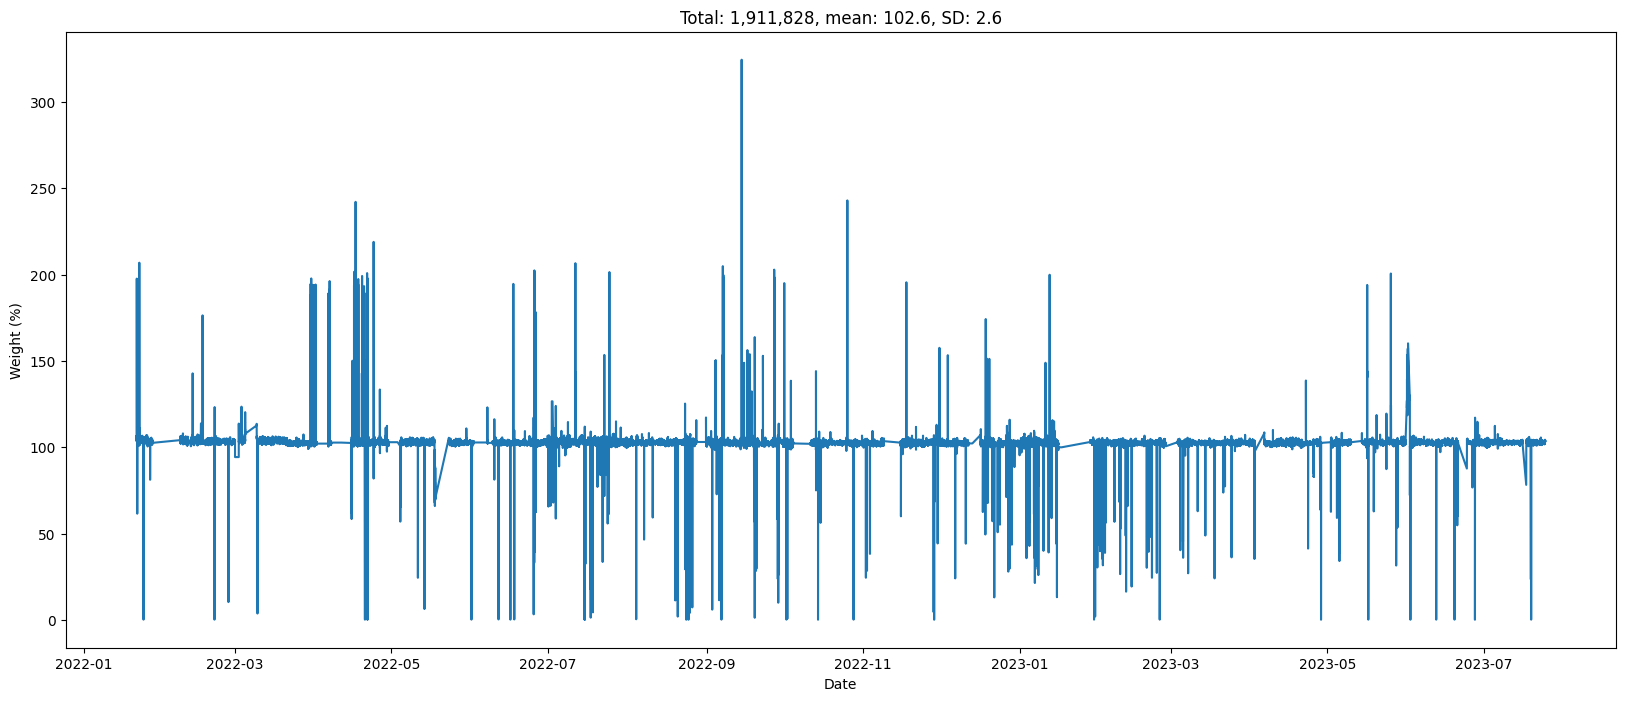

In [61]:

plt.figure(figsize=(20, 8))  # Create a figure with the desired size

# Assuming df_nona['HJ17秤重%PV'] contains your y-axis data, and you have x-axis data as well
# If x-axis data is the index of the DataFrame, you can use df_nona.index as x-axis values
sns.lineplot(x=df_nona['Unnamed: 0'], y=df_nona['HJ17秤重%PV'].values)

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off
# Optionally, you can add labels, title, etc. to your plot
plt.xlabel('Date')
plt.ylabel('Weight (%)')
plt.title('Total: 1,911,828, mean: 102.6, SD: 2.6')

plt.show()  # Display the plot

In [47]:
df_nona.columns

Index(['HJ17引取扭力PV值', 'HJ17引取速度PV值', 'HJ17水槽真空度PV值', 'HJ17水槽溫度PV值 ',
       'HJ17主機扭力PV值', 'HJ17主機速度PV值', 'HJ17供料扭力PV值', 'HJ17供料速度PV值',
       'HJ17真空度PV值', 'HJ17秤重%PV', 'HJ17單管秤重PV_F', 'HJ17單管設重SV'],
      dtype='object')

In [27]:
df_nona['HJ17水槽真空度PV值']

88311      196.0
88312      195.0
88313      195.0
88314      195.0
88315      196.0
           ...  
2462479    152.0
2462480    167.0
2462481    167.0
2462482    179.0
2462483    169.0
Name: HJ17水槽真空度PV值, Length: 1911828, dtype: float64

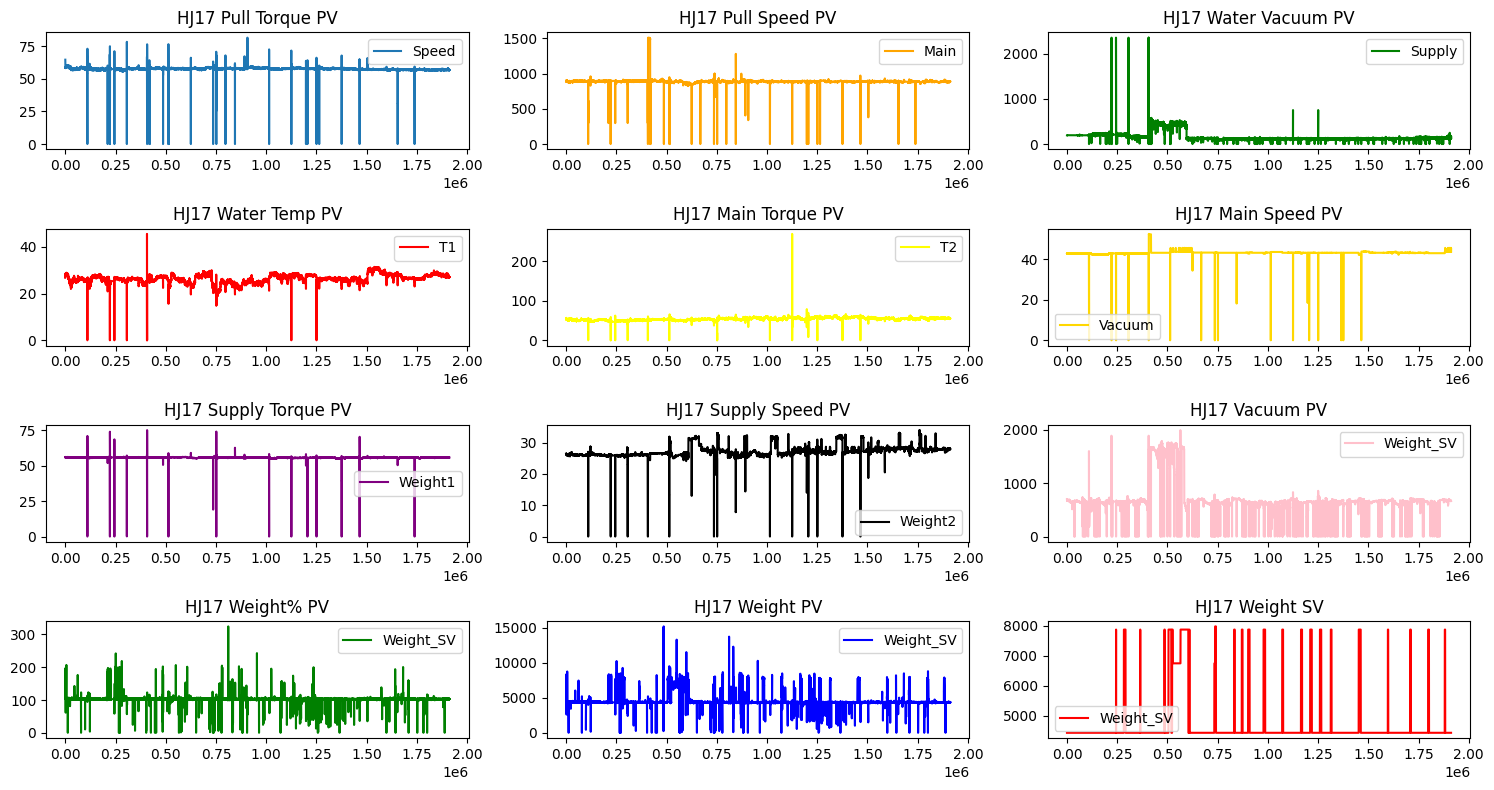

In [28]:
import matplotlib.pyplot as plt

# 設置子圖表的佈局 (2x2 網格)
fig, axs = plt.subplots(4, 3, figsize=(15, 8))

# 繪製第一個子圖表 (左上)
axs[0, 0].plot(df_nona['HJ17引取扭力PV值'].values, label='Speed')
axs[0, 0].set_title('HJ17 Pull Torque PV')
axs[0, 0].legend()

# 繪製第二個子圖表 (右上)
axs[0, 1].plot(df_nona['HJ17引取速度PV值'].values, label='Main', color='orange')
axs[0, 1].set_title('HJ17 Pull Speed PV')
axs[0, 1].legend()

# 繪製第三個子圖表 (左下)
axs[0, 2].plot(df_nona['HJ17水槽真空度PV值'].values, label='Supply', color='green')
axs[0, 2].set_title('HJ17 Water Vacuum PV')
axs[0, 2].legend()

# 繪製第四個子圖表 (右下)
axs[1, 0].plot(df_nona['HJ17水槽溫度PV值 '].values, label='T1', color='red')
axs[1, 0].set_title('HJ17 Water Temp PV')
axs[1, 0].legend()

# 繪製第五個子圖表 (右下)
axs[1, 1].plot(df_nona['HJ17主機扭力PV值'].values, label='T2', color='yellow')
axs[1, 1].set_title('HJ17 Main Torque PV')
axs[1, 1].legend()

# 繪製第六個子圖表 (右下)
axs[1, 2].plot(df_nona['HJ17主機速度PV值'].values, label='Vacuum', color='gold')
axs[1, 2].set_title('HJ17 Main Speed PV')
axs[1, 2].legend()

# 繪製第七個子圖表 (右下)
axs[2, 0].plot(df_nona['HJ17供料扭力PV值'].values, label='Weight1', color='purple')
axs[2, 0].set_title('HJ17 Supply Torque PV')
axs[2, 0].legend()

# 繪製第八個子圖表 (右下)
axs[2, 1].plot(df_nona['HJ17供料速度PV值'].values, label='Weight2', color='black')
axs[2, 1].set_title('HJ17 Supply Speed PV')
axs[2, 1].legend()

# 繪製第九個子圖表 (右下)
axs[2, 2].plot(df_nona['HJ17真空度PV值'].values, label='Weight_SV', color='pink')
axs[2, 2].set_title('HJ17 Vacuum PV')
axs[2, 2].legend()

# 繪製第10個子圖表 (右下)
axs[3, 0].plot(df_nona['HJ17秤重%PV'].values, label='Weight_SV', color='green')
axs[3, 0].set_title('HJ17 Weight% PV')
axs[3, 0].legend()

# 繪製第11個子圖表 (右下)
axs[3, 1].plot(df_nona['HJ17單管秤重PV_F'].values, label='Weight_SV', color='blue')
axs[3, 1].set_title('HJ17 Weight PV')
axs[3, 1].legend()

# 繪製第12個子圖表 (右下)
axs[3, 2].plot(df_nona['HJ17單管設重SV'].values, label='Weight_SV', color='red')
axs[3, 2].set_title('HJ17 Weight SV')
axs[3, 2].legend()


# 調整子圖表之間的間距
plt.tight_layout()

# 顯示圖表
plt.show()


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Serif TC


<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Serif TC


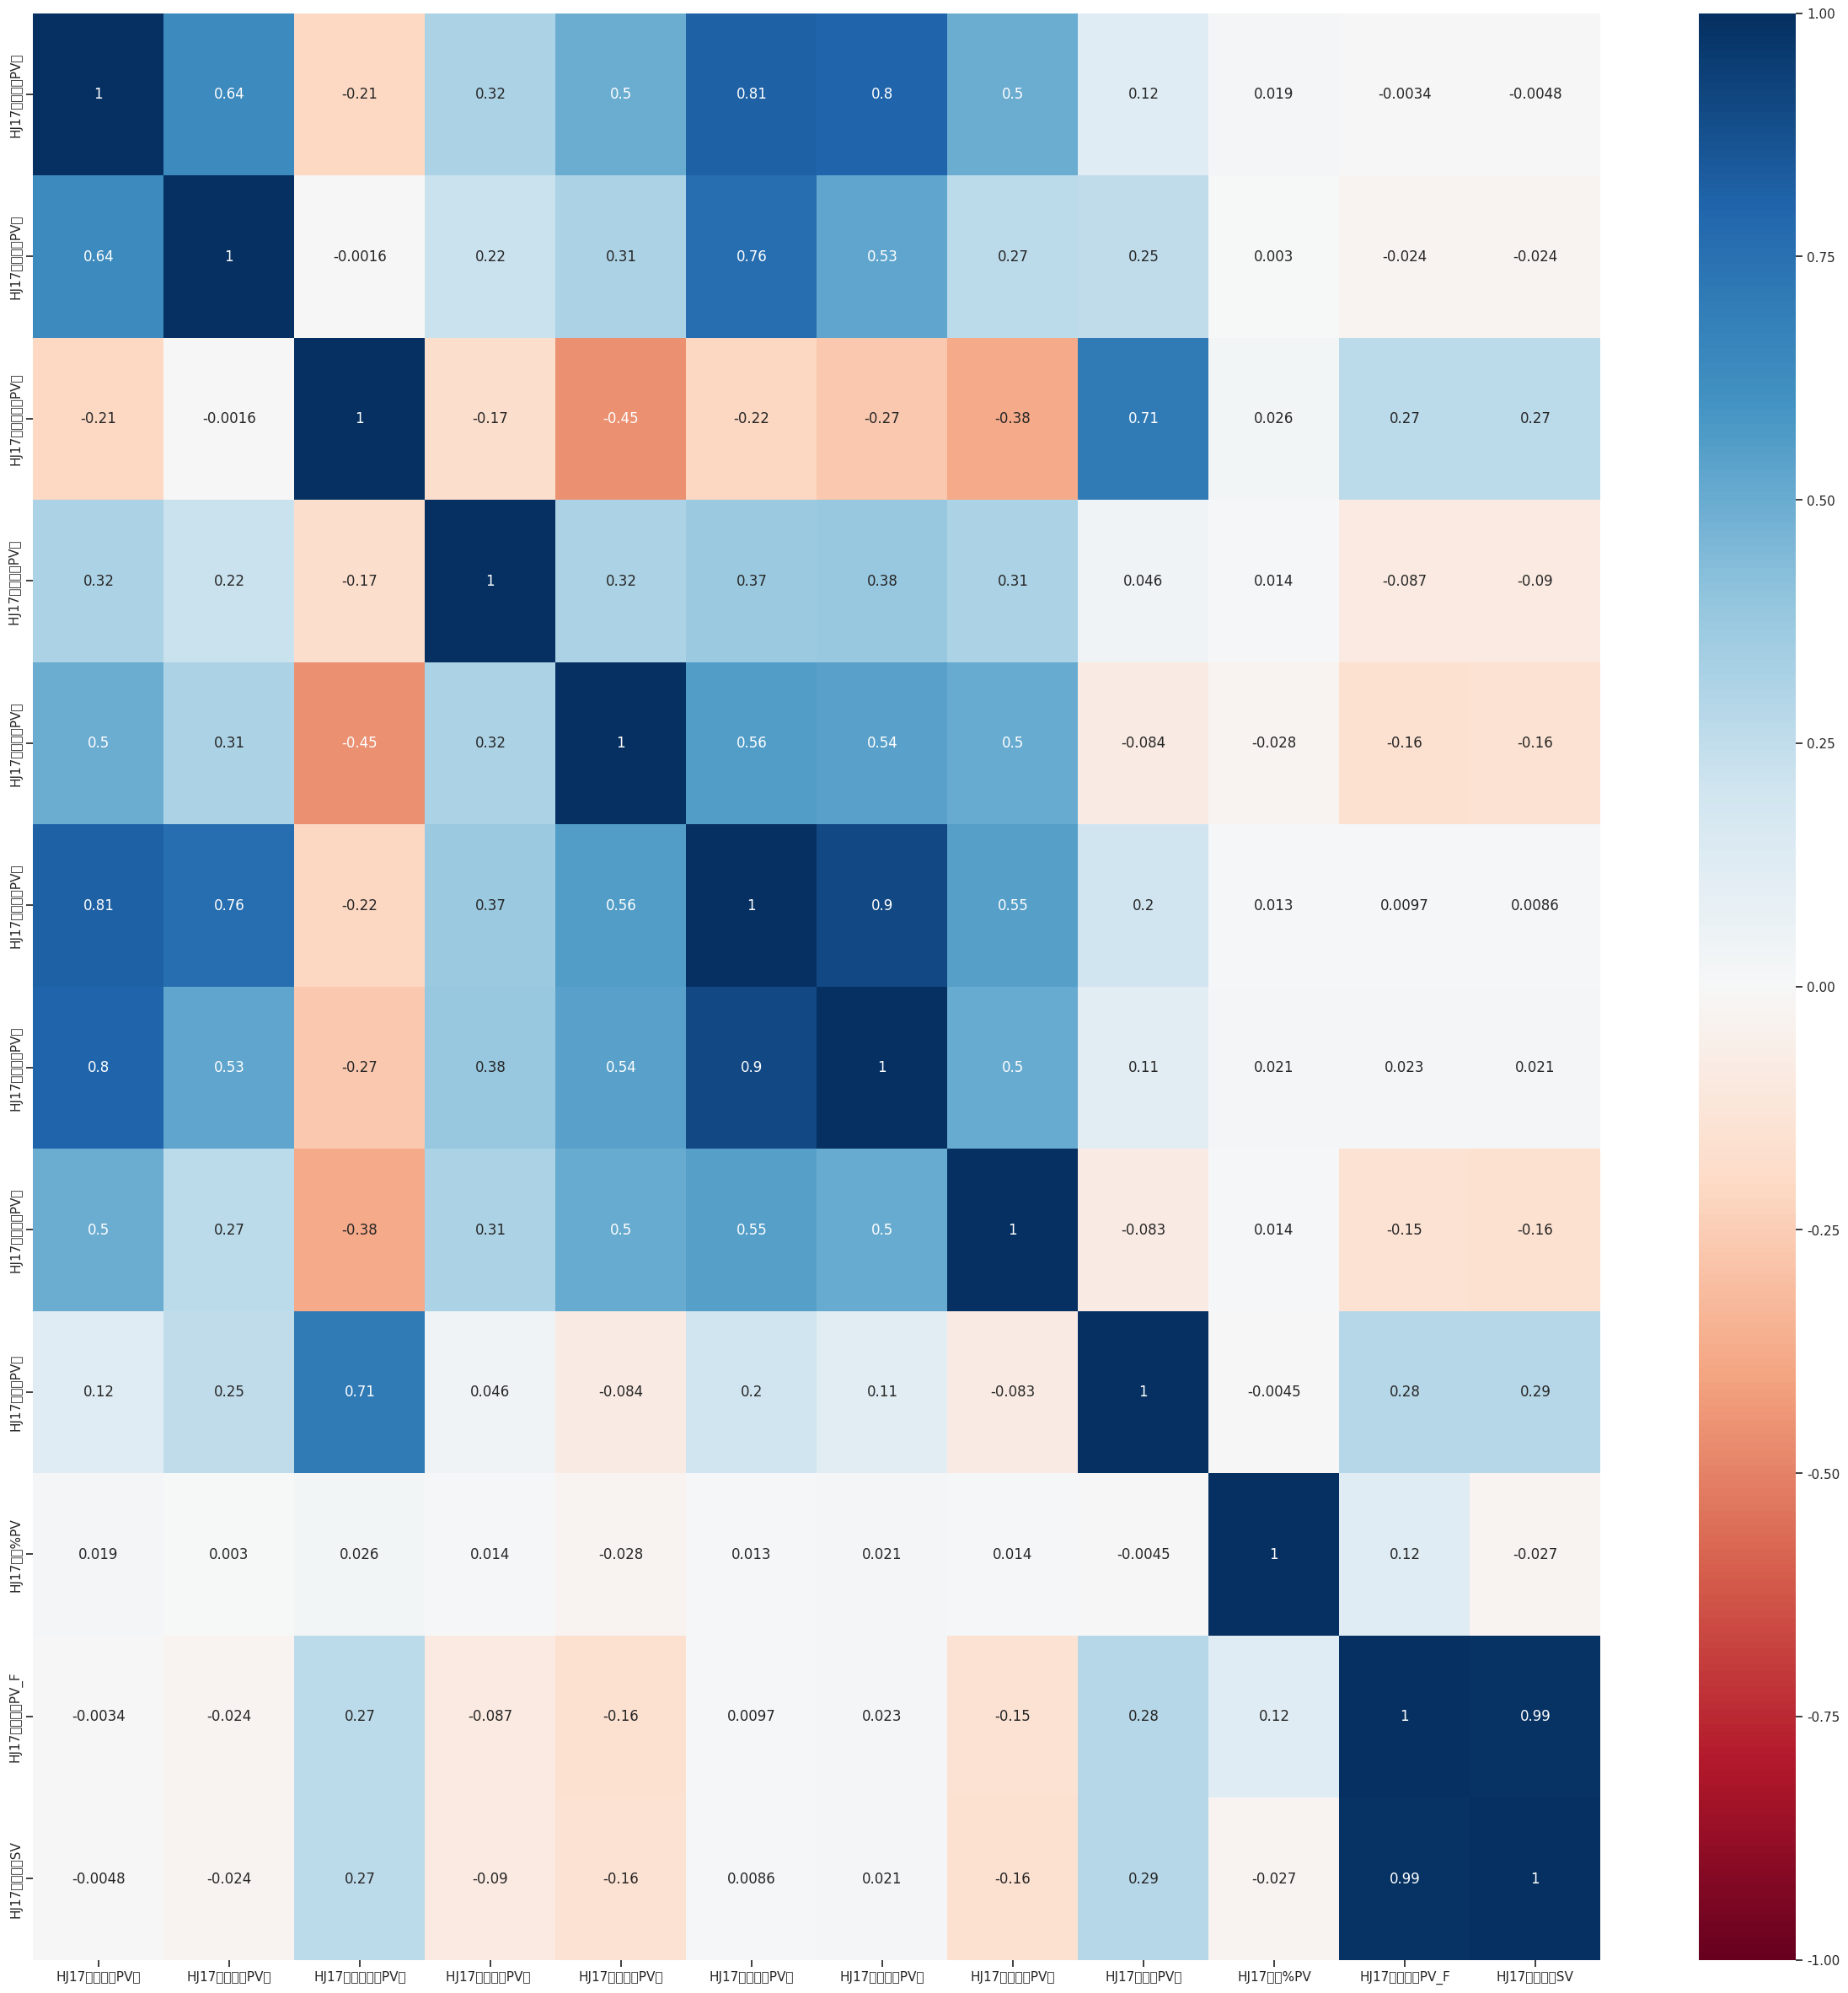

In [25]:
rc = {'figure.figsize':(30,30),
      'font.sans-serif': 'Noto Serif TC',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
sns.heatmap(df_nona.corr(), cmap = 'RdBu', vmin=-1, vmax=1,annot=True)

<AxesSubplot:xlabel='Value', ylabel='Count'>

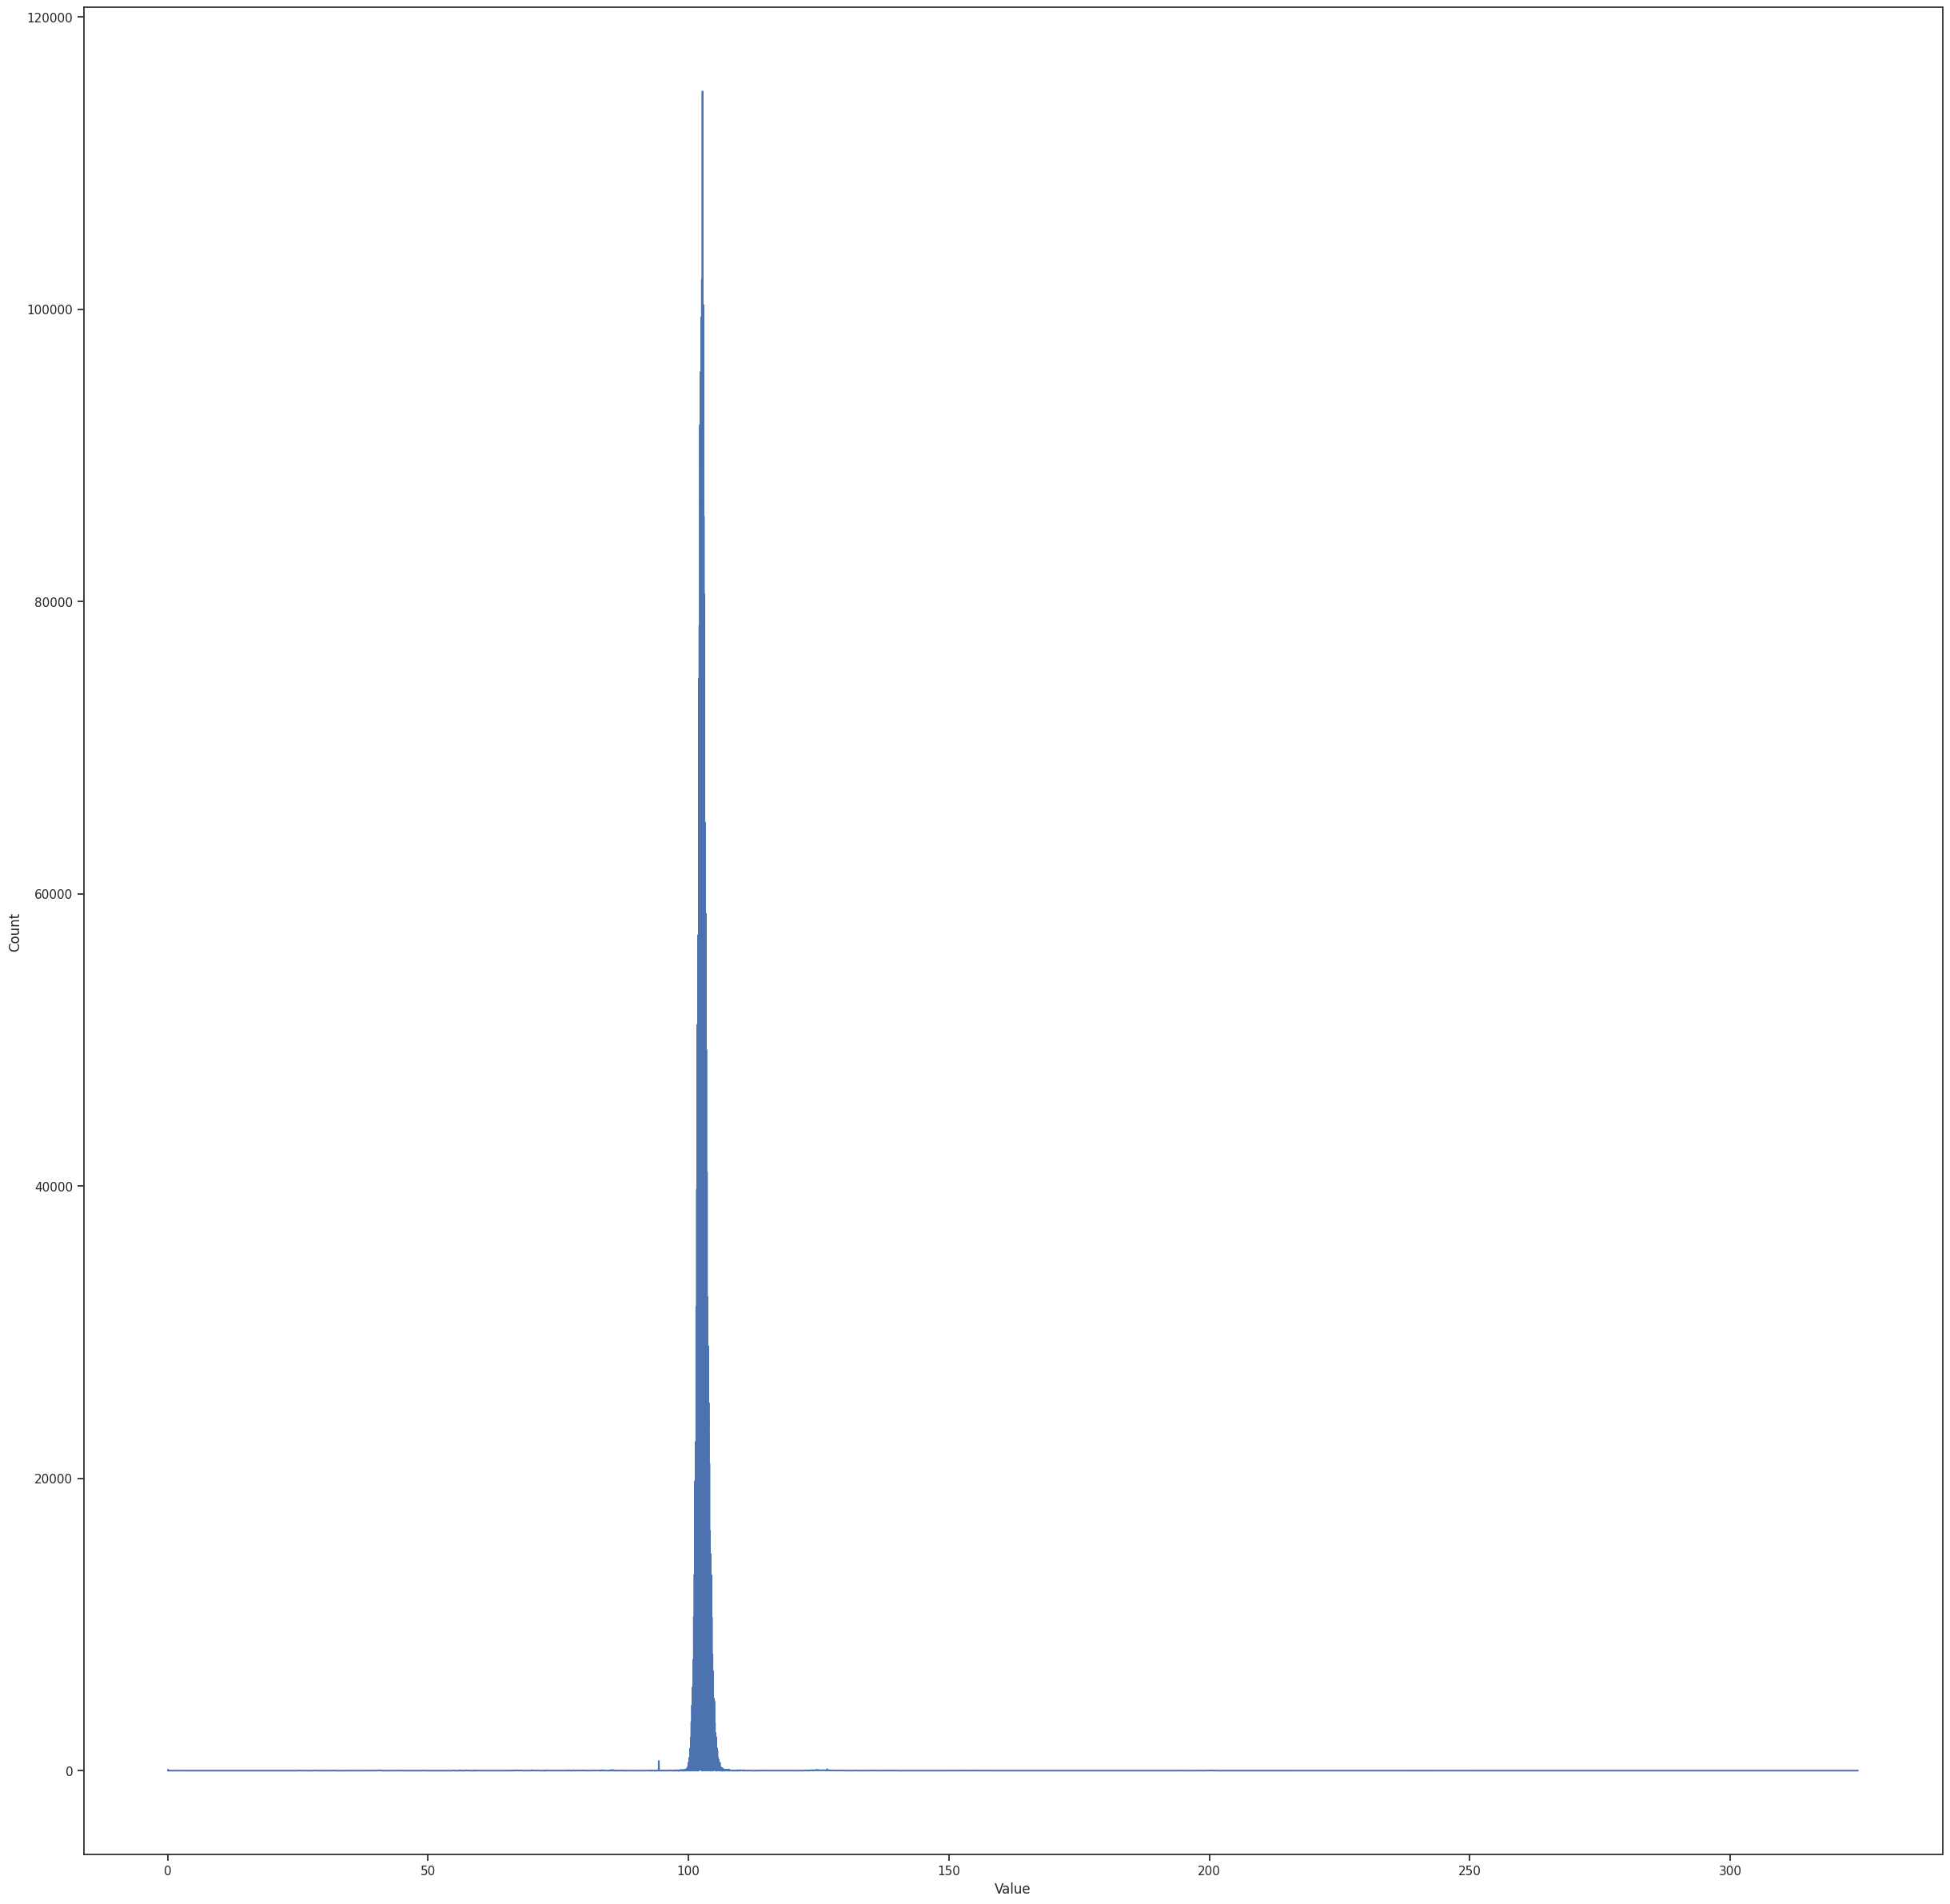

In [30]:
# 計算每個唯一值的計數
value_counts = df_nona['HJ17秤重%PV'].value_counts()

# 將計數轉換為 DataFrame
value_counts_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})

# 使用 Seaborn 繪製條形圖
sns.lineplot(x='Value', y='Count', data=value_counts_df)


# 數據再處理

In [71]:
# data = [7686, 1878142, 25933]
# labels = ['< 100', '100 ~ 105', '> 105']

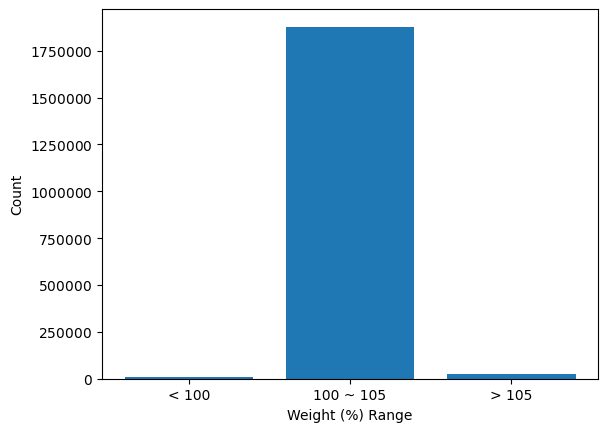

In [79]:
# from matplotlib.ticker import ScalarFormatter

# plt.bar(labels, data)

# # 添加标签和标题
# plt.xlabel('Weight (%) Range')
# plt.ylabel('Count')
# # plt.title('Bar Chart')

# # 禁用科学记号（设置y轴格式）
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# # 设置y轴刻度
# plt.ticklabel_format(style='plain', axis='y')  # 设置y轴刻度为常规数字

# plt.show()

In [65]:
# df_nona[(df_nona['HJ17秤重%PV'] > 100) & (df_nona['HJ17秤重%PV'] < 105)].shape
# df_nona[df_nona['HJ17秤重%PV'] < 100].shape
# df_nona[df_nona['HJ17秤重%PV'] > 105].shape

(7686, 13)

In [27]:
df_95_110 = df_nona[(df_nona['HJ17秤重%PV'] > 95) & (df_nona['HJ17秤重%PV'] < 110)]
df_nona.shape, df_95_110.shape

((1911828, 13), (1903990, 13))

<AxesSubplot:xlabel='Value', ylabel='Count'>

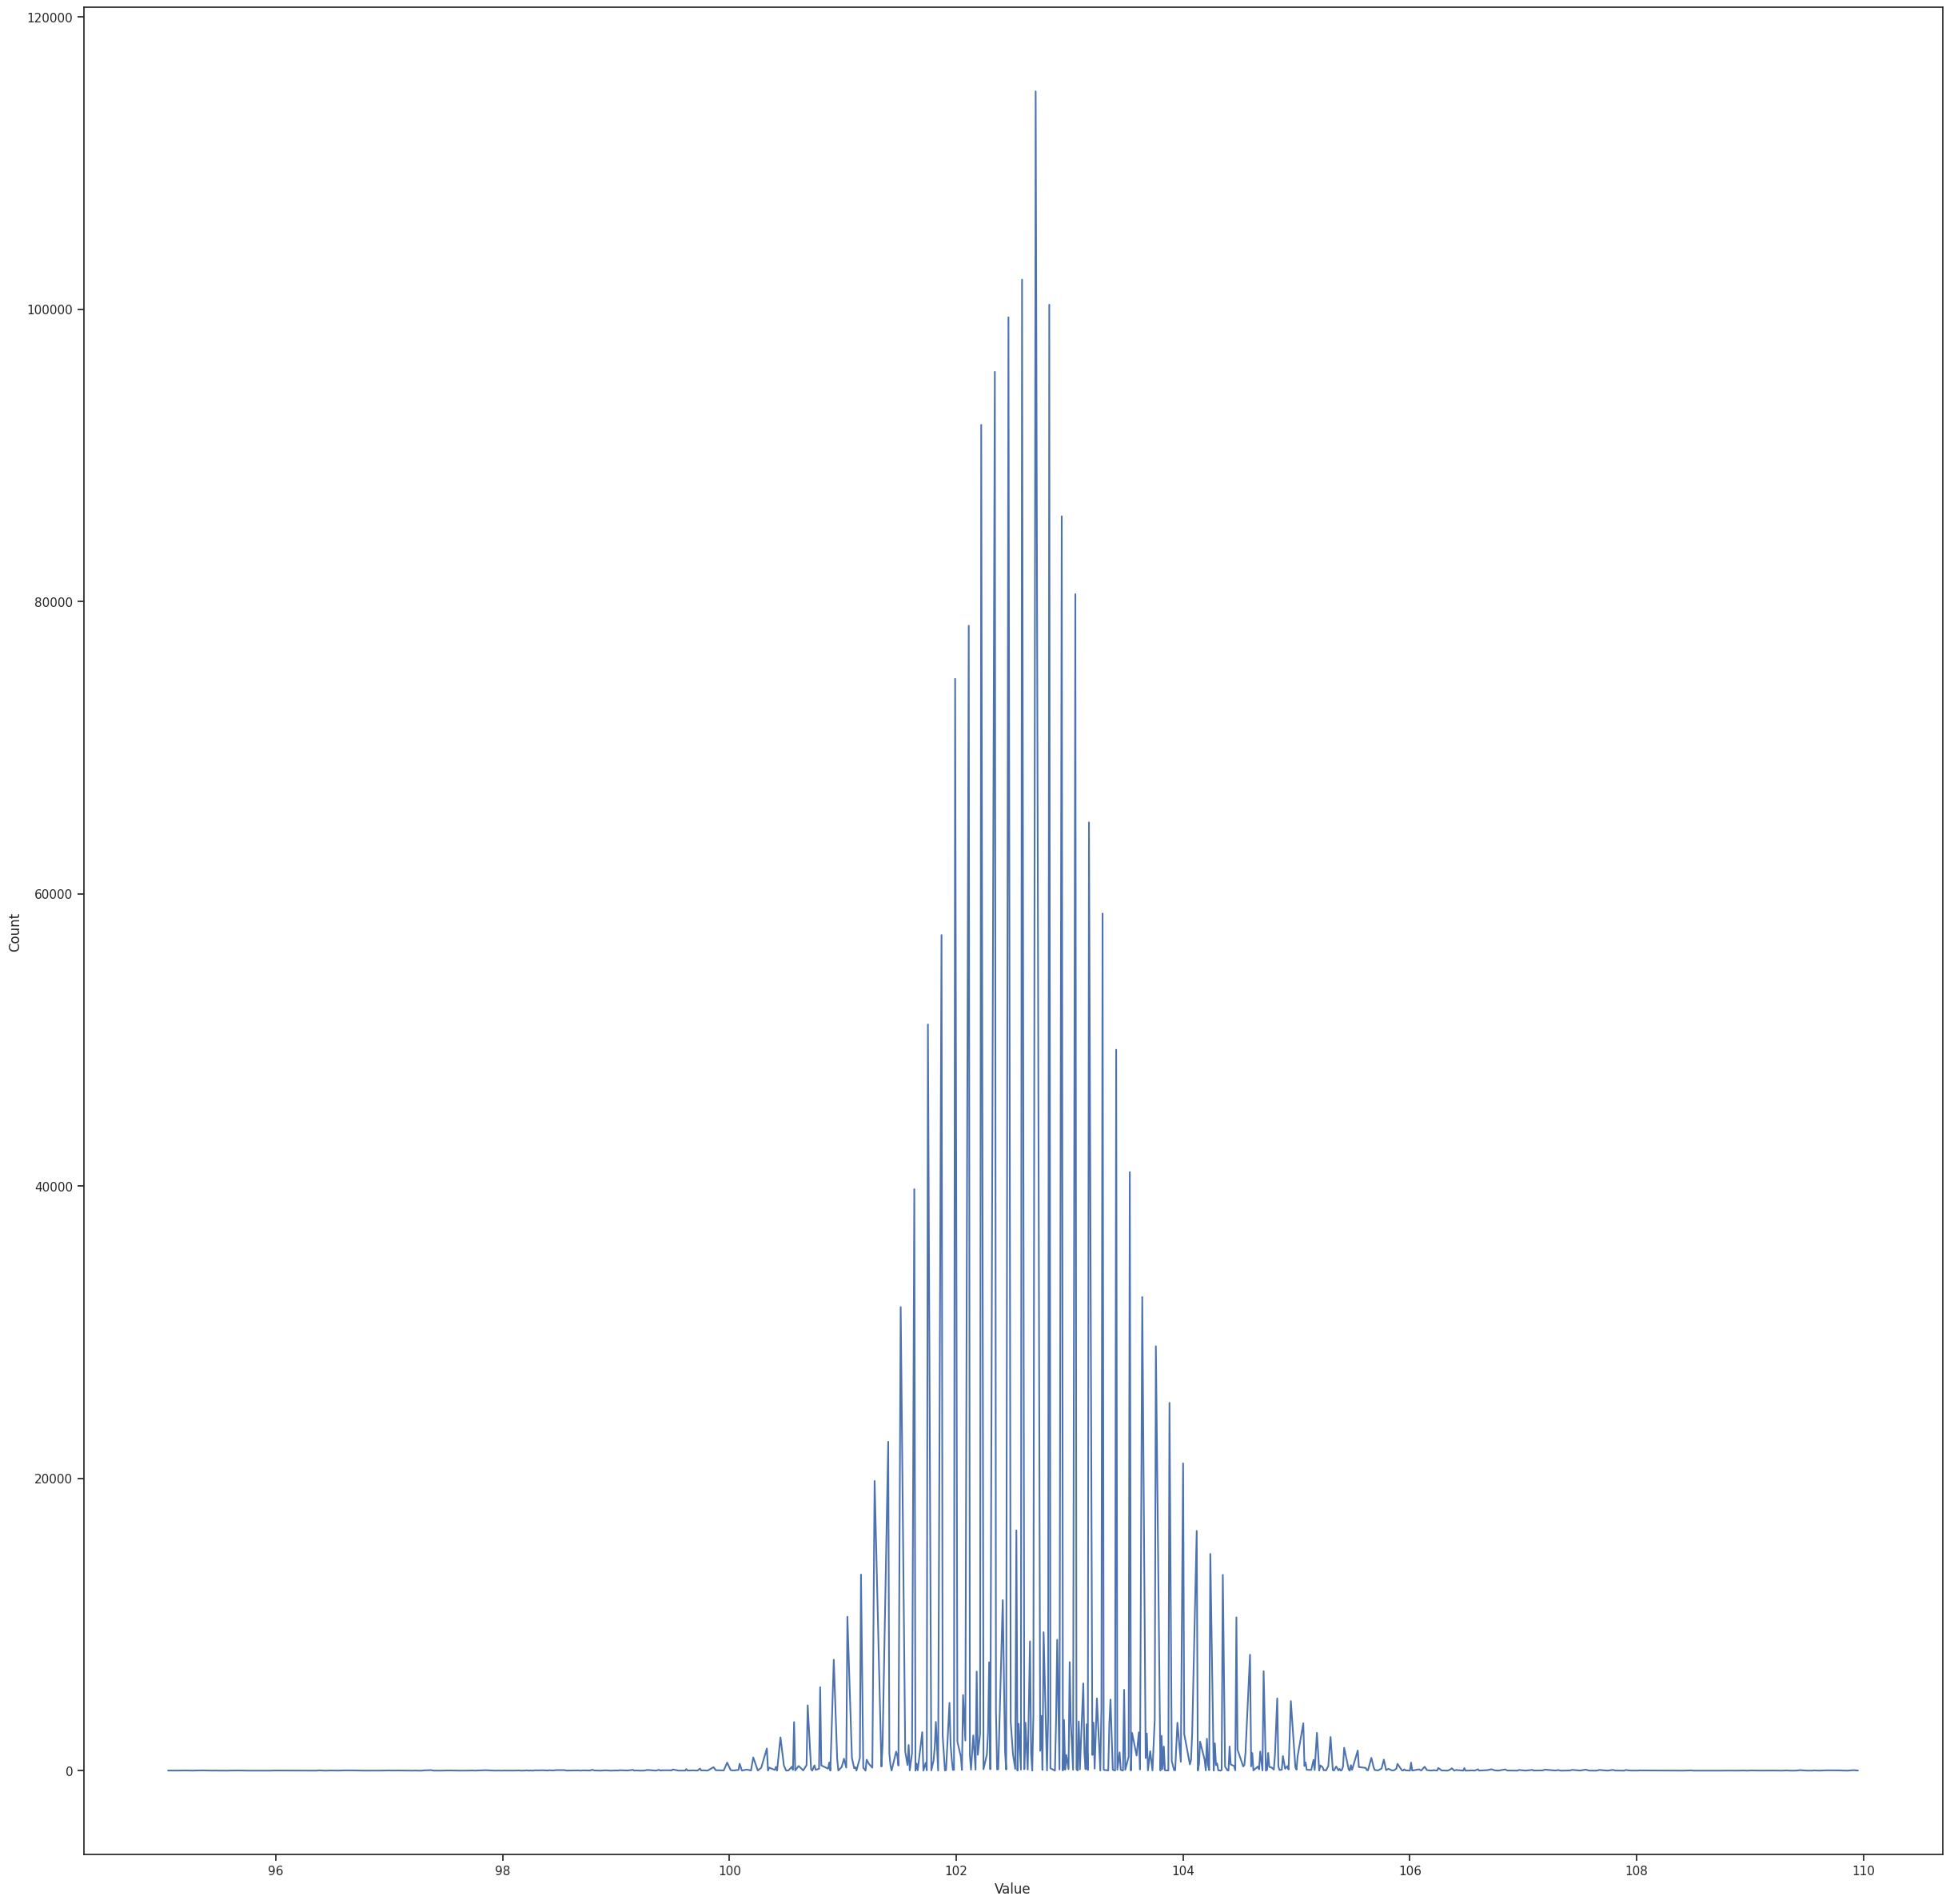

In [28]:
# 計算每個唯一值的計數
value_counts = df_95_110['HJ17秤重%PV'].value_counts()

# 將計數轉換為 DataFrame
value_counts_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})

# 使用 Seaborn 繪製條形圖
sns.lineplot(x='Value', y='Count', data=value_counts_df)

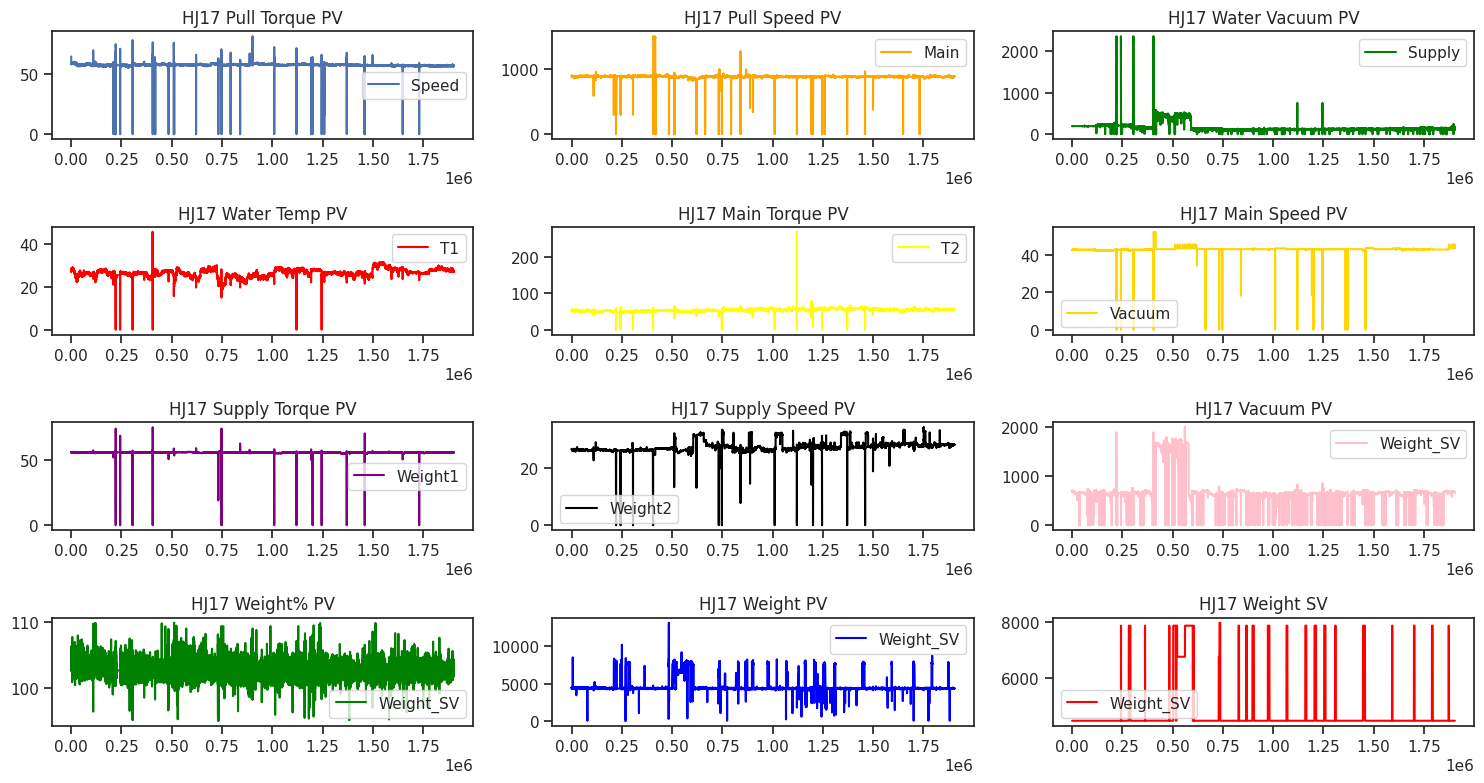

In [33]:
import matplotlib.pyplot as plt

# 設置子圖表的佈局 (2x2 網格)
fig, axs = plt.subplots(4, 3, figsize=(15, 8))

# 繪製第一個子圖表 (左上)
axs[0, 0].plot(df_95_110['HJ17引取扭力PV值'].values, label='Speed')
axs[0, 0].set_title('HJ17 Pull Torque PV')
axs[0, 0].legend()

# 繪製第二個子圖表 (右上)
axs[0, 1].plot(df_95_110['HJ17引取速度PV值'].values, label='Main', color='orange')
axs[0, 1].set_title('HJ17 Pull Speed PV')
axs[0, 1].legend()

# 繪製第三個子圖表 (左下)
axs[0, 2].plot(df_95_110['HJ17水槽真空度PV值'].values, label='Supply', color='green')
axs[0, 2].set_title('HJ17 Water Vacuum PV')
axs[0, 2].legend()

# 繪製第四個子圖表 (右下)
axs[1, 0].plot(df_95_110['HJ17水槽溫度PV值 '].values, label='T1', color='red')
axs[1, 0].set_title('HJ17 Water Temp PV')
axs[1, 0].legend()

# 繪製第五個子圖表 (右下)
axs[1, 1].plot(df_95_110['HJ17主機扭力PV值'].values, label='T2', color='yellow')
axs[1, 1].set_title('HJ17 Main Torque PV')
axs[1, 1].legend()

# 繪製第六個子圖表 (右下)
axs[1, 2].plot(df_95_110['HJ17主機速度PV值'].values, label='Vacuum', color='gold')
axs[1, 2].set_title('HJ17 Main Speed PV')
axs[1, 2].legend()

# 繪製第七個子圖表 (右下)
axs[2, 0].plot(df_95_110['HJ17供料扭力PV值'].values, label='Weight1', color='purple')
axs[2, 0].set_title('HJ17 Supply Torque PV')
axs[2, 0].legend()

# 繪製第八個子圖表 (右下)
axs[2, 1].plot(df_95_110['HJ17供料速度PV值'].values, label='Weight2', color='black')
axs[2, 1].set_title('HJ17 Supply Speed PV')
axs[2, 1].legend()

# 繪製第九個子圖表 (右下)
axs[2, 2].plot(df_95_110['HJ17真空度PV值'].values, label='Weight_SV', color='pink')
axs[2, 2].set_title('HJ17 Vacuum PV')
axs[2, 2].legend()

# 繪製第10個子圖表 (右下)
axs[3, 0].plot(df_95_110['HJ17秤重%PV'].values, label='Weight_SV', color='green')
axs[3, 0].set_title('HJ17 Weight% PV')
axs[3, 0].legend()

# 繪製第11個子圖表 (右下)
axs[3, 1].plot(df_95_110['HJ17單管秤重PV_F'].values, label='Weight_SV', color='blue')
axs[3, 1].set_title('HJ17 Weight PV')
axs[3, 1].legend()

# 繪製第12個子圖表 (右下)
axs[3, 2].plot(df_95_110['HJ17單管設重SV'].values, label='Weight_SV', color='red')
axs[3, 2].set_title('HJ17 Weight SV')
axs[3, 2].legend()

# 調整子圖表之間的間距
plt.tight_layout()

# 顯示圖表
plt.show()

In [34]:
for i, column_name in enumerate(df_95_110.columns):
    unique_values = sorted(df_95_110[column_name].unique())
    print(column_name, unique_values)

HJ17引取扭力PV值 [0.0, 0.100000001, 0.200000003, 0.400000006, 3.299999952, 4.5, 5.5, 5.699999809, 5.800000191, 5.900000095, 6.300000191, 6.400000095, 7.300000191, 7.800000191, 8.5, 9.100000381, 9.899999619, 10.0, 10.5, 10.60000038, 10.80000019, 11.30000019, 11.39999962, 12.39999962, 12.5, 12.60000038, 12.69999981, 13.0, 13.10000038, 13.30000019, 13.60000038, 14.30000019, 14.39999962, 14.89999962, 15.30000019, 15.39999962, 15.60000038, 16.10000038, 16.5, 16.89999962, 17.0, 17.10000038, 17.29999924, 17.39999962, 17.60000038, 17.79999924, 18.10000038, 18.29999924, 18.89999962, 19.39999962, 19.70000076, 19.79999924, 19.89999962, 21.20000076, 21.29999924, 21.60000038, 21.89999962, 22.20000076, 22.39999962, 23.79999924, 24.0, 24.79999924, 25.0, 25.39999962, 25.5, 25.60000038, 27.10000038, 28.0, 28.10000038, 28.60000038, 28.89999962, 30.39999962, 31.29999924, 31.5, 31.89999962, 32.40000153, 33.09999847, 34.29999924, 34.40000153, 34.70000076, 36.90000153, 37.70000076, 37.79999924, 39.20000076, 40.7

In [35]:
df_95_110.shape

(1903990, 12)

In [29]:
# 將特定欄位中的值為 0 的部分替換為 NaN
columns_to_replace = ['HJ17引取扭力PV值', 'HJ17引取速度PV值', 'HJ17水槽溫度PV值 ', 'HJ17主機扭力PV值', 'HJ17主機速度PV值', 'HJ17供料扭力PV值', 'HJ17供料速度PV值']  # 在此列表中添加要替換的其他欄位
df_95_110[columns_to_replace] = df_95_110[columns_to_replace].replace(0, np.nan)
df_95_110.dropna(inplace=True)
df_95_110.shape

(1899669, 13)

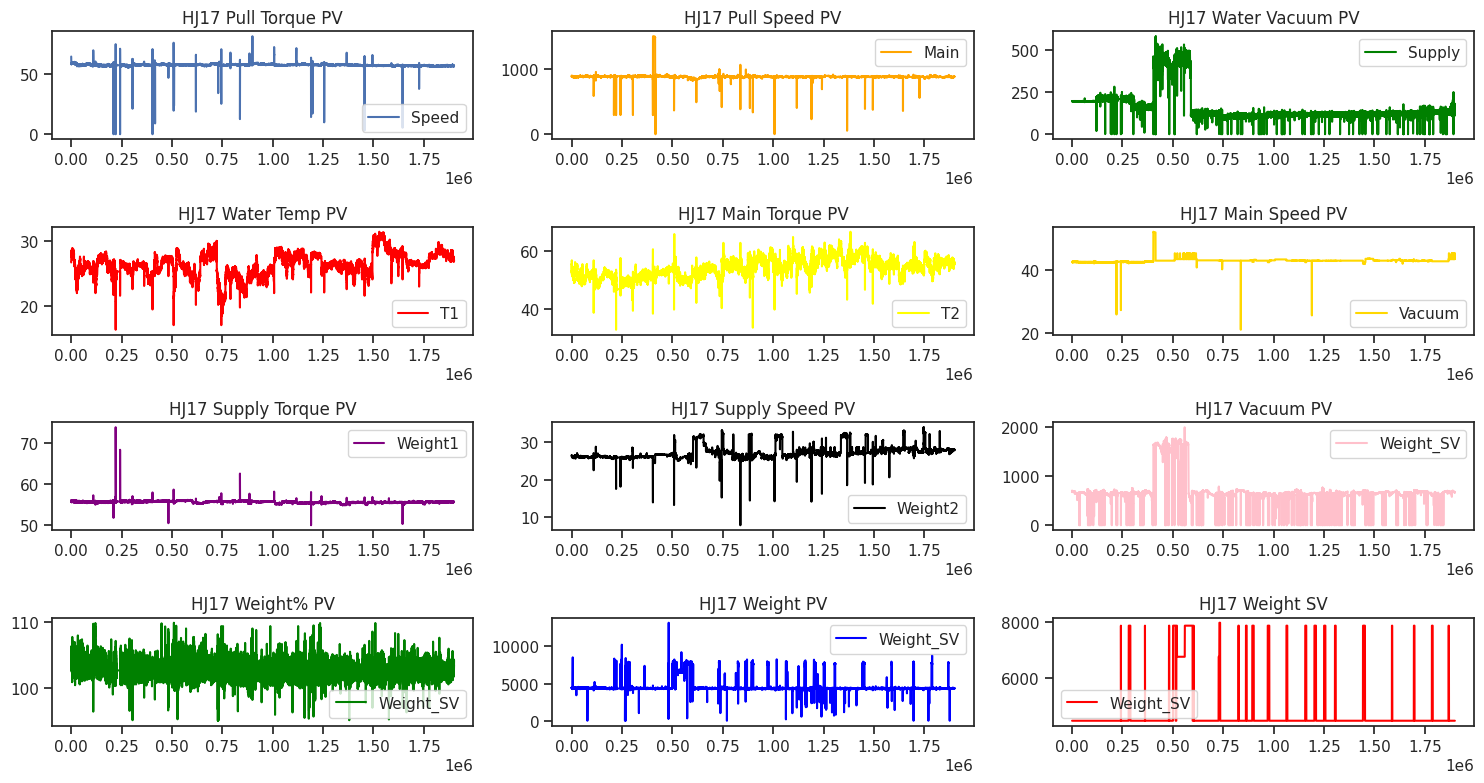

In [37]:
import matplotlib.pyplot as plt

# 設置子圖表的佈局 (2x2 網格)
fig, axs = plt.subplots(4, 3, figsize=(15, 8))

# 繪製第一個子圖表 (左上)
axs[0, 0].plot(df_95_110['HJ17引取扭力PV值'].values, label='Speed')
axs[0, 0].set_title('HJ17 Pull Torque PV')
axs[0, 0].legend()

# 繪製第二個子圖表 (右上)
axs[0, 1].plot(df_95_110['HJ17引取速度PV值'].values, label='Main', color='orange')
axs[0, 1].set_title('HJ17 Pull Speed PV')
axs[0, 1].legend()

# 繪製第三個子圖表 (左下)
axs[0, 2].plot(df_95_110['HJ17水槽真空度PV值'].values, label='Supply', color='green')
axs[0, 2].set_title('HJ17 Water Vacuum PV')
axs[0, 2].legend()

# 繪製第四個子圖表 (右下)
axs[1, 0].plot(df_95_110['HJ17水槽溫度PV值 '].values, label='T1', color='red')
axs[1, 0].set_title('HJ17 Water Temp PV')
axs[1, 0].legend()

# 繪製第五個子圖表 (右下)
axs[1, 1].plot(df_95_110['HJ17主機扭力PV值'].values, label='T2', color='yellow')
axs[1, 1].set_title('HJ17 Main Torque PV')
axs[1, 1].legend()

# 繪製第六個子圖表 (右下)
axs[1, 2].plot(df_95_110['HJ17主機速度PV值'].values, label='Vacuum', color='gold')
axs[1, 2].set_title('HJ17 Main Speed PV')
axs[1, 2].legend()

# 繪製第七個子圖表 (右下)
axs[2, 0].plot(df_95_110['HJ17供料扭力PV值'].values, label='Weight1', color='purple')
axs[2, 0].set_title('HJ17 Supply Torque PV')
axs[2, 0].legend()

# 繪製第八個子圖表 (右下)
axs[2, 1].plot(df_95_110['HJ17供料速度PV值'].values, label='Weight2', color='black')
axs[2, 1].set_title('HJ17 Supply Speed PV')
axs[2, 1].legend()

# 繪製第九個子圖表 (右下)
axs[2, 2].plot(df_95_110['HJ17真空度PV值'].values, label='Weight_SV', color='pink')
axs[2, 2].set_title('HJ17 Vacuum PV')
axs[2, 2].legend()

# 繪製第10個子圖表 (右下)
axs[3, 0].plot(df_95_110['HJ17秤重%PV'].values, label='Weight_SV', color='green')
axs[3, 0].set_title('HJ17 Weight% PV')
axs[3, 0].legend()

# 繪製第11個子圖表 (右下)
axs[3, 1].plot(df_95_110['HJ17單管秤重PV_F'].values, label='Weight_SV', color='blue')
axs[3, 1].set_title('HJ17 Weight PV')
axs[3, 1].legend()

# 繪製第12個子圖表 (右下)
axs[3, 2].plot(df_95_110['HJ17單管設重SV'].values, label='Weight_SV', color='red')
axs[3, 2].set_title('HJ17 Weight SV')
axs[3, 2].legend()

# 調整子圖表之間的間距
plt.tight_layout()

# 顯示圖表
plt.show()

# 建立模型

In [30]:
df_95_110.columns

Index(['Date', 'HJ17引取扭力PV值', 'HJ17引取速度PV值', 'HJ17水槽真空度PV值', 'HJ17水槽溫度PV值 ',
       'HJ17主機扭力PV值', 'HJ17主機速度PV值', 'HJ17供料扭力PV值', 'HJ17供料速度PV值',
       'HJ17真空度PV值', 'HJ17秤重%PV', 'HJ17單管秤重PV_F', 'HJ17單管設重SV'],
      dtype='object')

In [34]:
X = df_95_110.drop(['Date', 'HJ17秤重%PV', 'HJ17單管秤重PV_F', 'HJ17單管設重SV'], axis=1)
# X = df_95_110[['HJ17引取速度PV值', 'HJ17水槽真空度PV值', 'HJ17水槽溫度PV值 ', 'HJ17主機速度PV值', 'HJ17供料速度PV值']]
y = df_95_110['HJ17秤重%PV']
X.shape, y.shape

((1899669, 9), (1899669,))

In [32]:
df_95_110['HJ17秤重%PV'].describe()

count    1.899669e+06
mean     1.026980e+02
std      8.730230e-01
min      9.505000e+01
25%      1.021100e+02
50%      1.026800e+02
75%      1.031700e+02
max      1.099500e+02
Name: HJ17秤重%PV, dtype: float64

<AxesSubplot:ylabel='HJ17秤重%PV'>

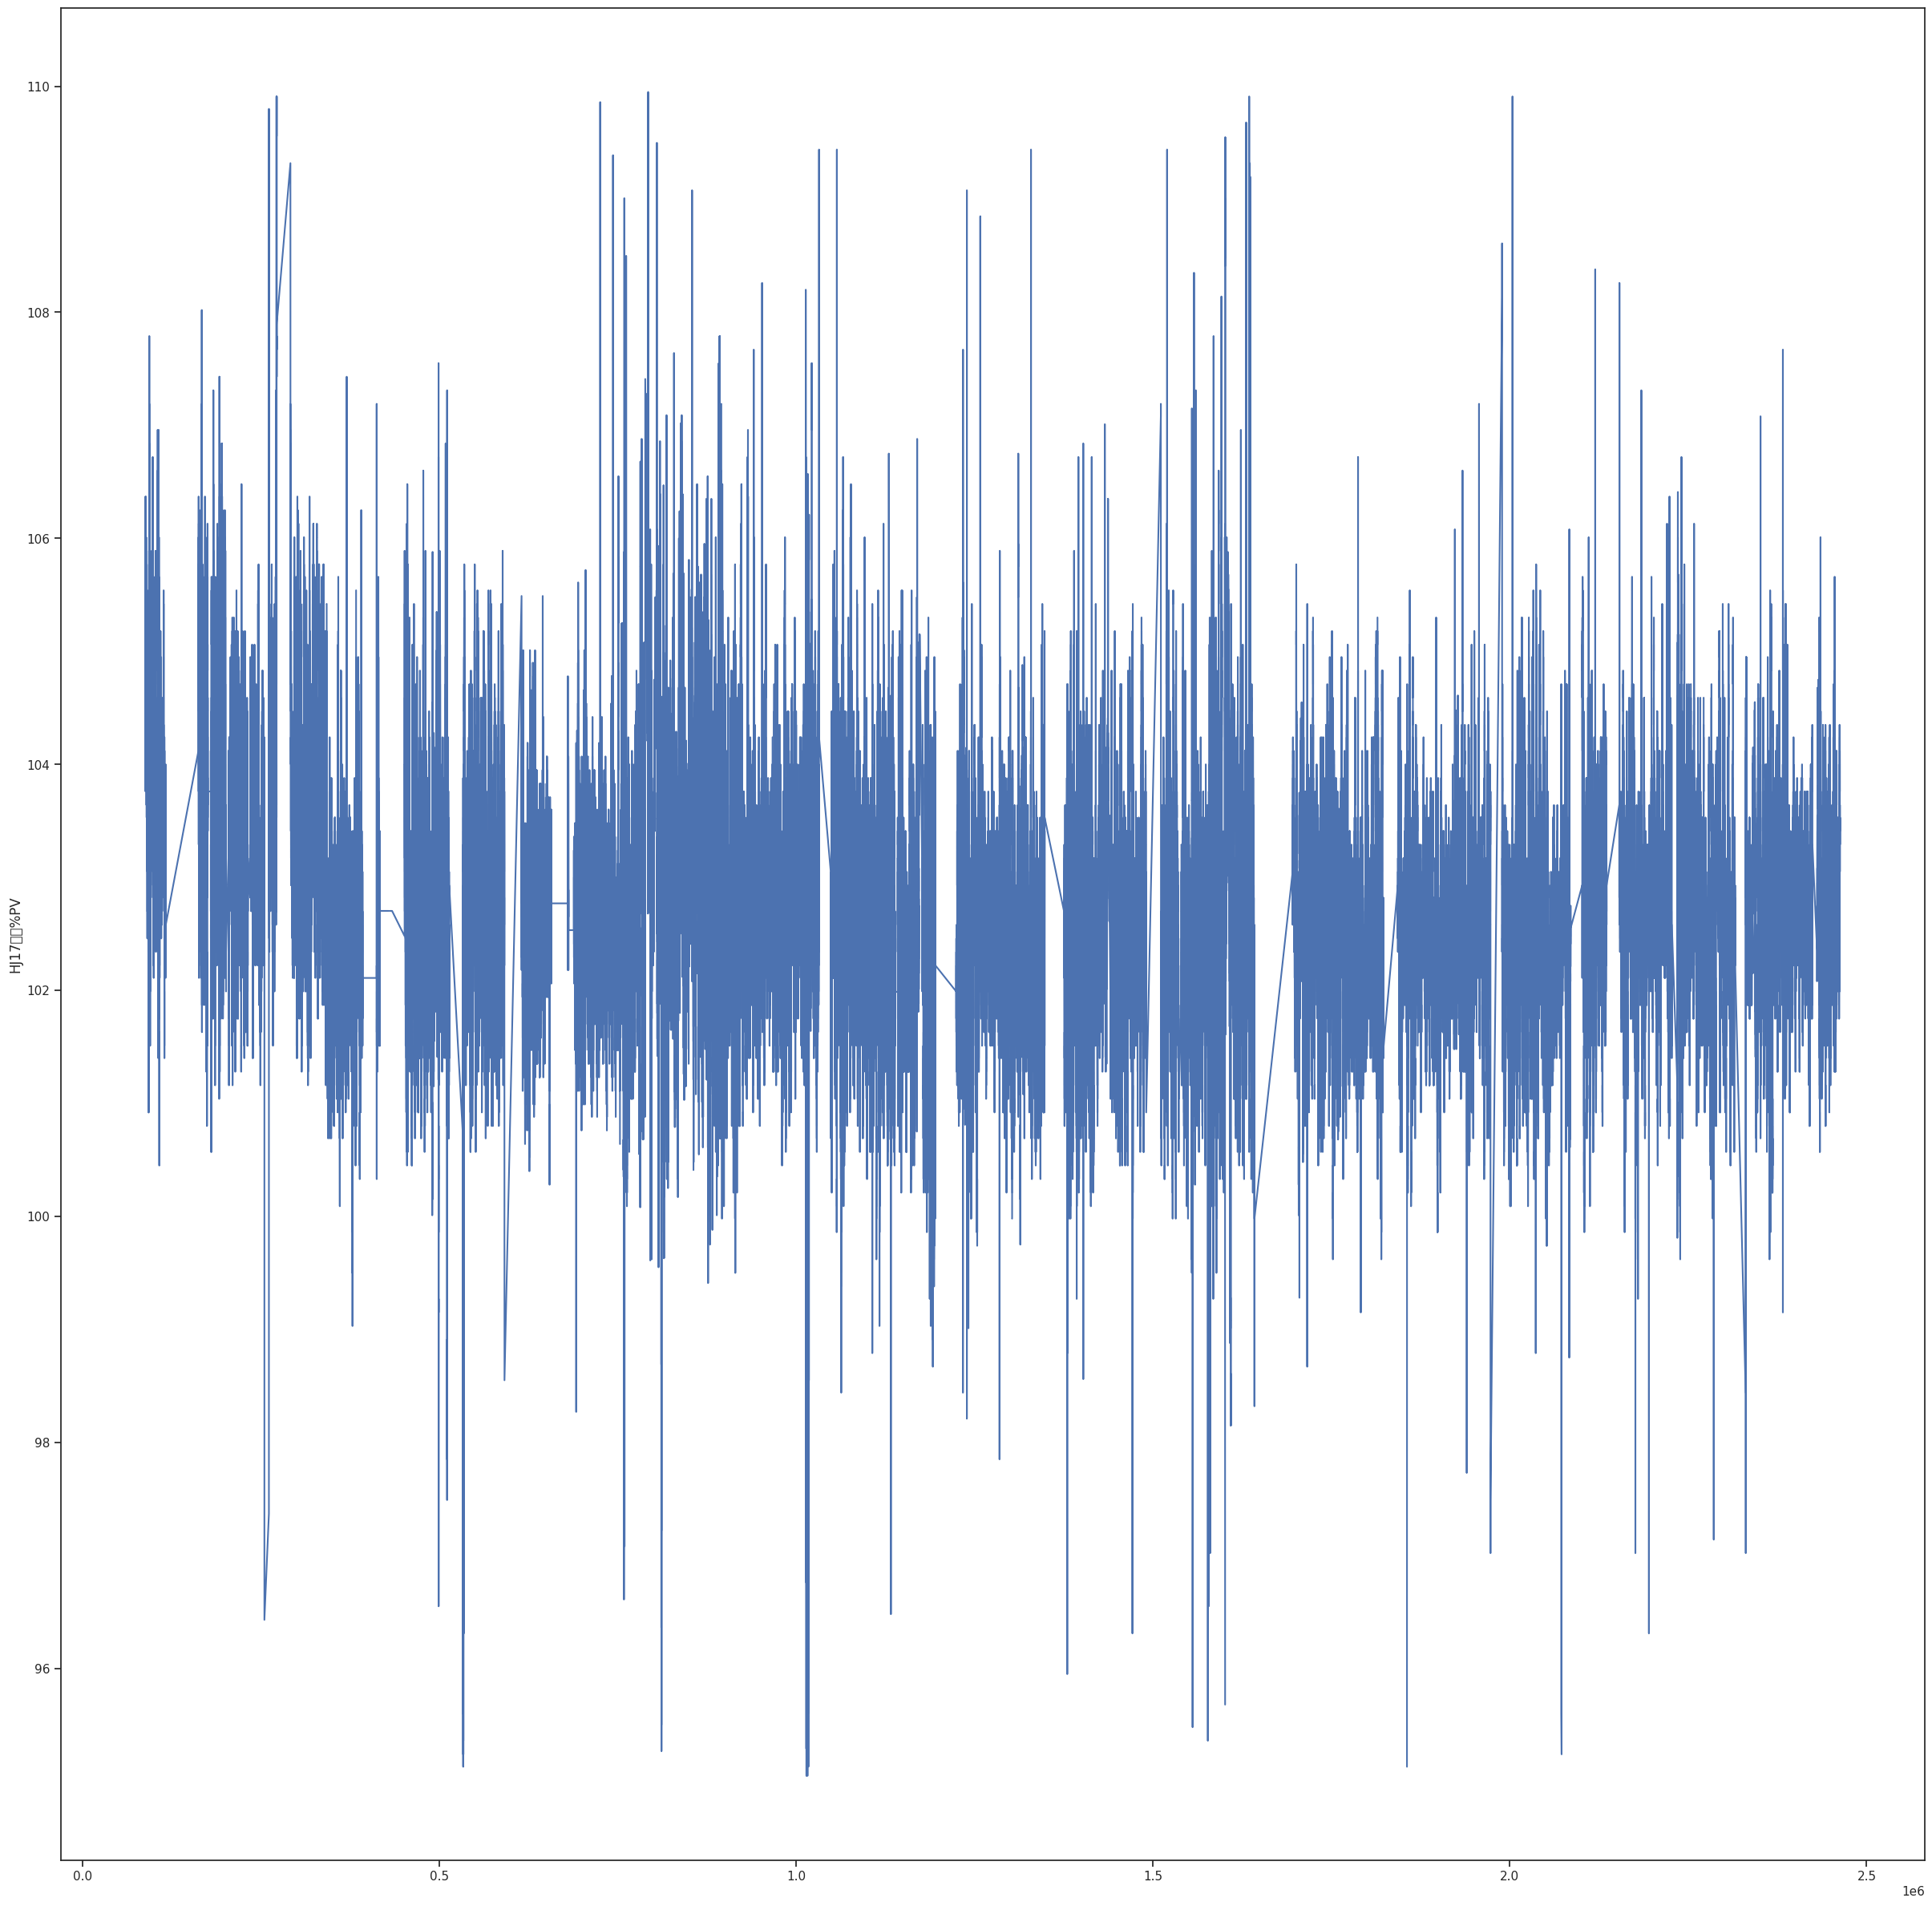

In [71]:
sns.lineplot(df_95_110['HJ17秤重%PV'])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 假設您已經有特徵資料X和標籤y

# 將資料分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建 MinMaxScaler 实例
scaler = MinMaxScaler()

# 对训练集特征进行标准化
X_train_scaled = scaler.fit_transform(X_train)

# 对测试集特征进行标准化
X_test_scaled = scaler.transform(X_test)

# 建立模型列表
models = [LinearRegression(), Lasso(), KNeighborsRegressor(), 
          DecisionTreeRegressor(), RandomForestRegressor(), 
          XGBRegressor(objective ='reg:squarederror')]

# 迴圈訓練和評估模型
for model in models:
    model_name = model.__class__.__name__  # 獲取模型的名稱
    print(f"Training {model_name}...")

    # 訓練模型
    model.fit(X_train, y_train)

    # 預測測試集
    y_pred = model.predict(X_test)

    # 評估模型，這裡使用均方誤差（MSE）作為評估指標，您可以根據需要選擇其他指標
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)
    # 計算絕對百分比誤差（APE）
    ape = np.abs((y_pred - y_test) / y_test) * 100

    # 計算平均絕對百分比誤差（MAPE）
    mape = np.mean(ape)
    print(f"{model_name} - MAPE: {mape}")
    print(f"{model_name} - RMSE: {rmse}")
    print(f"{model_name} - R2: {r_squared}")

    # 可以在這裡進行其他後續操作，例如保存模型等
    # ...

    print("=" * 75)  # 分隔線，用於區分不同模型的訓練和評估結果


Training LinearRegression...
LinearRegression - MAPE: 0.6269114128885585
LinearRegression - RMSE: 0.85100972387731
LinearRegression - R2: 0.04973248311105205
Training Lasso...
Lasso - MAPE: 0.6303283495277033
Lasso - RMSE: 0.85777713527159
Lasso - R2: 0.03455892917238379
Training KNeighborsRegressor...
KNeighborsRegressor - MAPE: 0.2926910582240528
KNeighborsRegressor - RMSE: 0.45735911678460217
KNeighborsRegressor - R2: 0.7255321248966866
Training DecisionTreeRegressor...
DecisionTreeRegressor - MAPE: 0.2598797705727161
DecisionTreeRegressor - RMSE: 0.44283966094886534
DecisionTreeRegressor - R2: 0.742682183088923
Training RandomForestRegressor...
RandomForestRegressor - MAPE: 0.21394414542463874
RandomForestRegressor - RMSE: 0.34227123121330283
RandomForestRegressor - R2: 0.846284510220324
Training XGBRegressor...
XGBRegressor - MAPE: 0.39759151715277147
XGBRegressor - RMSE: 0.5627133689831687
XGBRegressor - R2: 0.5845188686219921


In [ ]:
'''
2023/8/1 運行時間9m40s
===========================================================================
Training LinearRegression...
LinearRegression - RMSE: 0.85100972387731
LinearRegression - R2: 0.04973248311105205
===========================================================================
Training Lasso...
Lasso - RMSE: 0.85777713527159
Lasso - R2: 0.03455892917238379
===========================================================================
Training KNeighborsRegressor...
KNeighborsRegressor - RMSE: 0.45735911678460217
KNeighborsRegressor - R2: 0.7255321248966866
===========================================================================
Training DecisionTreeRegressor...
DecisionTreeRegressor - RMSE: 0.4421887192363526
DecisionTreeRegressor - R2: 0.7434381036156117
===========================================================================
Training RandomForestRegressor...
RandomForestRegressor - RMSE: 0.3424990868677062
RandomForestRegressor - R2: 0.8460797801778056
===========================================================================
Training XGBRegressor...
XGBRegressor - RMSE: 0.5627133689831687
XGBRegressor - R2: 0.5845188686219921
===========================================================================
'''

'''
2023/8/9 運行時間9m25s
Training LinearRegression...
LinearRegression - MAPE: 0.6269114128885585
LinearRegression - RMSE: 0.85100972387731
LinearRegression - R2: 0.04973248311105205
===========================================================================
Training Lasso...
Lasso - MAPE: 0.6303283495277033
Lasso - RMSE: 0.85777713527159
Lasso - R2: 0.03455892917238379
===========================================================================
Training KNeighborsRegressor...
KNeighborsRegressor - MAPE: 0.2926910582240528
KNeighborsRegressor - RMSE: 0.45735911678460217
KNeighborsRegressor - R2: 0.7255321248966866
===========================================================================
Training DecisionTreeRegressor...
DecisionTreeRegressor - MAPE: 0.2598499582691482
DecisionTreeRegressor - RMSE: 0.44209510440556476
DecisionTreeRegressor - R2: 0.743546724460388
===========================================================================
Training RandomForestRegressor...
RandomForestRegressor - MAPE: 0.2139685794830591
RandomForestRegressor - RMSE: 0.34275894581371796
RandomForestRegressor - R2: 0.8458461286383904
===========================================================================
...
XGBRegressor - MAPE: 0.39759151715277147
XGBRegressor - RMSE: 0.5627133689831687
XGBRegressor - R2: 0.5845188686219921
===========================================================================
'''

# GridSearch_CV RF

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 假設您有特徵資料X和標籤y
# 假設您已經對資料進行了預處理

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# 定義超參數的範圍
param_grid = {
    # 'n_estimators': [50, 100, 150],  # 決策樹的數量
    # 'max_depth': [None, 10, 20],     # 樹的最大深度，None表示不限制深度
    # 'min_samples_split': [2, 5, 10]  # 內部節點再劃分所需的最小樣本數
    'n_estimators': [150],
    'max_depth': [None],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
}


In [48]:
# 建立RandomForestRegressor模型
rf_model = RandomForestRegressor()

# 使用GridSearchCV進行網格搜索
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

# 開始訓練
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [10], 'n_estimators': [150]},
             scoring='neg_mean_squared_error')

In [49]:
# 獲取最佳模型和最佳超參數
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# 在測試集上進行預測
y_pred = best_rf_model.predict(X_test)

# 評估模型效果
mse = mean_squared_error(y_test, y_pred)

# 計算絕對百分比誤差（APE）
ape = np.abs((y_pred - y_test) / y_test) * 100

# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(ape)

r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)

print(f"Best Parameters: {best_params}")
print(f"MAPE: {mape}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
MAPE: 0.21092451224115172
Mean Squared Error (MSE): 0.11260373439616536
Root Mean Squared Error (RMSE): 0.3355647991017016
R-squared (R2): 0.8522492708754336


In [61]:
'''
656m 10.6s
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
MAPE: 0.21102992147767086
Mean Squared Error (MSE): 0.11269318546059771
Root Mean Squared Error (RMSE): 0.33569805698067084
R-squared (R2): 0.8521318994573209
'''

'''
152m 4.9s
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
MAPE: 0.21092451224115172
Mean Squared Error (MSE): 0.11260373439616536
Root Mean Squared Error (RMSE): 0.3355647991017016
R-squared (R2): 0.8522492708754336
'''

In [62]:
y_test

1065374    102.459999
296080     103.410004
700407     102.180000
2021721    101.279999
1872899    102.339996
              ...    
796602     103.410004
2392982    102.820000
1560157    101.870003
110023     103.290001
1235200    102.809998
Name: HJ17秤重%PV, Length: 379934, dtype: float64

In [100]:
# Convert y_test into DataFrame
df_y_test = pd.DataFrame({'True': y_test})
df_y_test = df_y_test.reset_index(drop=True)

# Convert y_pred into DataFrame
df_y_pred = pd.DataFrame({'Predicted': y_pred})


In [103]:
# Merge the DataFrames if needed
merged_df = pd.concat([df_y_test, df_y_pred], axis=1)

# Merge the DataFrames if needed
merged_df.shape

(379934, 2)

In [101]:
df_y_test

,True
0,102.459999
1,103.410004
2,102.180000
3,101.279999
4,102.339996
...,...
379929,103.410004
379930,102.820000
379931,101.870003
379932,103.290001


In [102]:
df_y_pred

,Predicted
0,103.002122
1,103.614011
2,102.324289
3,101.566420
4,102.443015
...,...
379929,103.311206
379930,102.786189
379931,101.994840
379932,103.110542


In [104]:
merged_df

,True,Predicted
0,102.459999,103.002122
1,103.410004,103.614011
2,102.180000,102.324289
3,101.279999,101.566420
4,102.339996,102.443015
...,...,...
379929,103.410004,103.311206
379930,102.820000,102.786189
379931,101.870003,101.994840
379932,103.290001,103.110542


In [40]:
import joblib

rf = joblib.load('random_forest_weight.pkl')

In [41]:
data = df_nona[-10000:]
data.shape

(10000, 13)

In [44]:
data.head(2)

,Date,HJ17引取扭力PV值,HJ17引取速度PV值,HJ17水槽真空度PV值,HJ17水槽溫度PV值,HJ17主機扭力PV值,HJ17主機速度PV值,HJ17供料扭力PV值,HJ17供料速度PV值,HJ17真空度PV值,HJ17秤重%PV,HJ17單管秤重PV_F,HJ17單管設重SV
2452376,2023-07-22 16:18:40,56.799999,883.0,134.0,27.5,57.0,43.599998,55.700001,28.0,700.0,102.93,4350.0,4437.0
2452377,2023-07-22 16:19:00,56.900002,883.0,149.0,27.5,57.0,43.599998,55.700001,28.0,700.0,102.93,4360.0,4437.0


In [45]:
data1 = data.drop(['Date', 'HJ17單管秤重PV_F', 'HJ17單管設重SV'], axis=1)
data1.shape

(10000, 10)

In [50]:
df_x = data1.drop('HJ17秤重%PV', axis=1)
df_y = data1['HJ17秤重%PV']
df_x.shape, df_y.shape

((10000, 9), (10000,))

In [51]:
df_x.dtypes

HJ17引取扭力PV值     float64
HJ17引取速度PV值     float64
HJ17水槽真空度PV值    float64
HJ17水槽溫度PV值     float64
HJ17主機扭力PV值     float64
HJ17主機速度PV值     float64
HJ17供料扭力PV值     float64
HJ17供料速度PV值     float64
HJ17真空度PV值      float64
dtype: object

In [52]:
result = rf.predict(df_x)

In [54]:
# Convert y_test into DataFrame
df_y_test = pd.DataFrame({'True': df_y})
df_y_test = df_y_test.reset_index(drop=True)

# Convert y_pred into DataFrame
df_y_pred = pd.DataFrame({'Predicted': result})

# Merge the DataFrames if needed
merged_df = pd.concat([df_y_test, df_y_pred], axis=1)

# Merge the DataFrames if needed
merged_df.shape

(10000, 2)

In [55]:
# 評估模型效果
mse = mean_squared_error(df_y, result)

# 計算絕對百分比誤差（APE）
ape = np.abs((result - df_y) / df_y) * 100

# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(ape)

r2 = r2_score(df_y, result)

rmse = np.sqrt(mse)

# print(f"Best Parameters: {best_params}")
print(f"MAPE: {mape}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

MAPE: 0.1449985057181204
Mean Squared Error (MSE): 0.045886845549443146
Root Mean Squared Error (RMSE): 0.2142121507978554
R-squared (R2): 0.8501380435676983


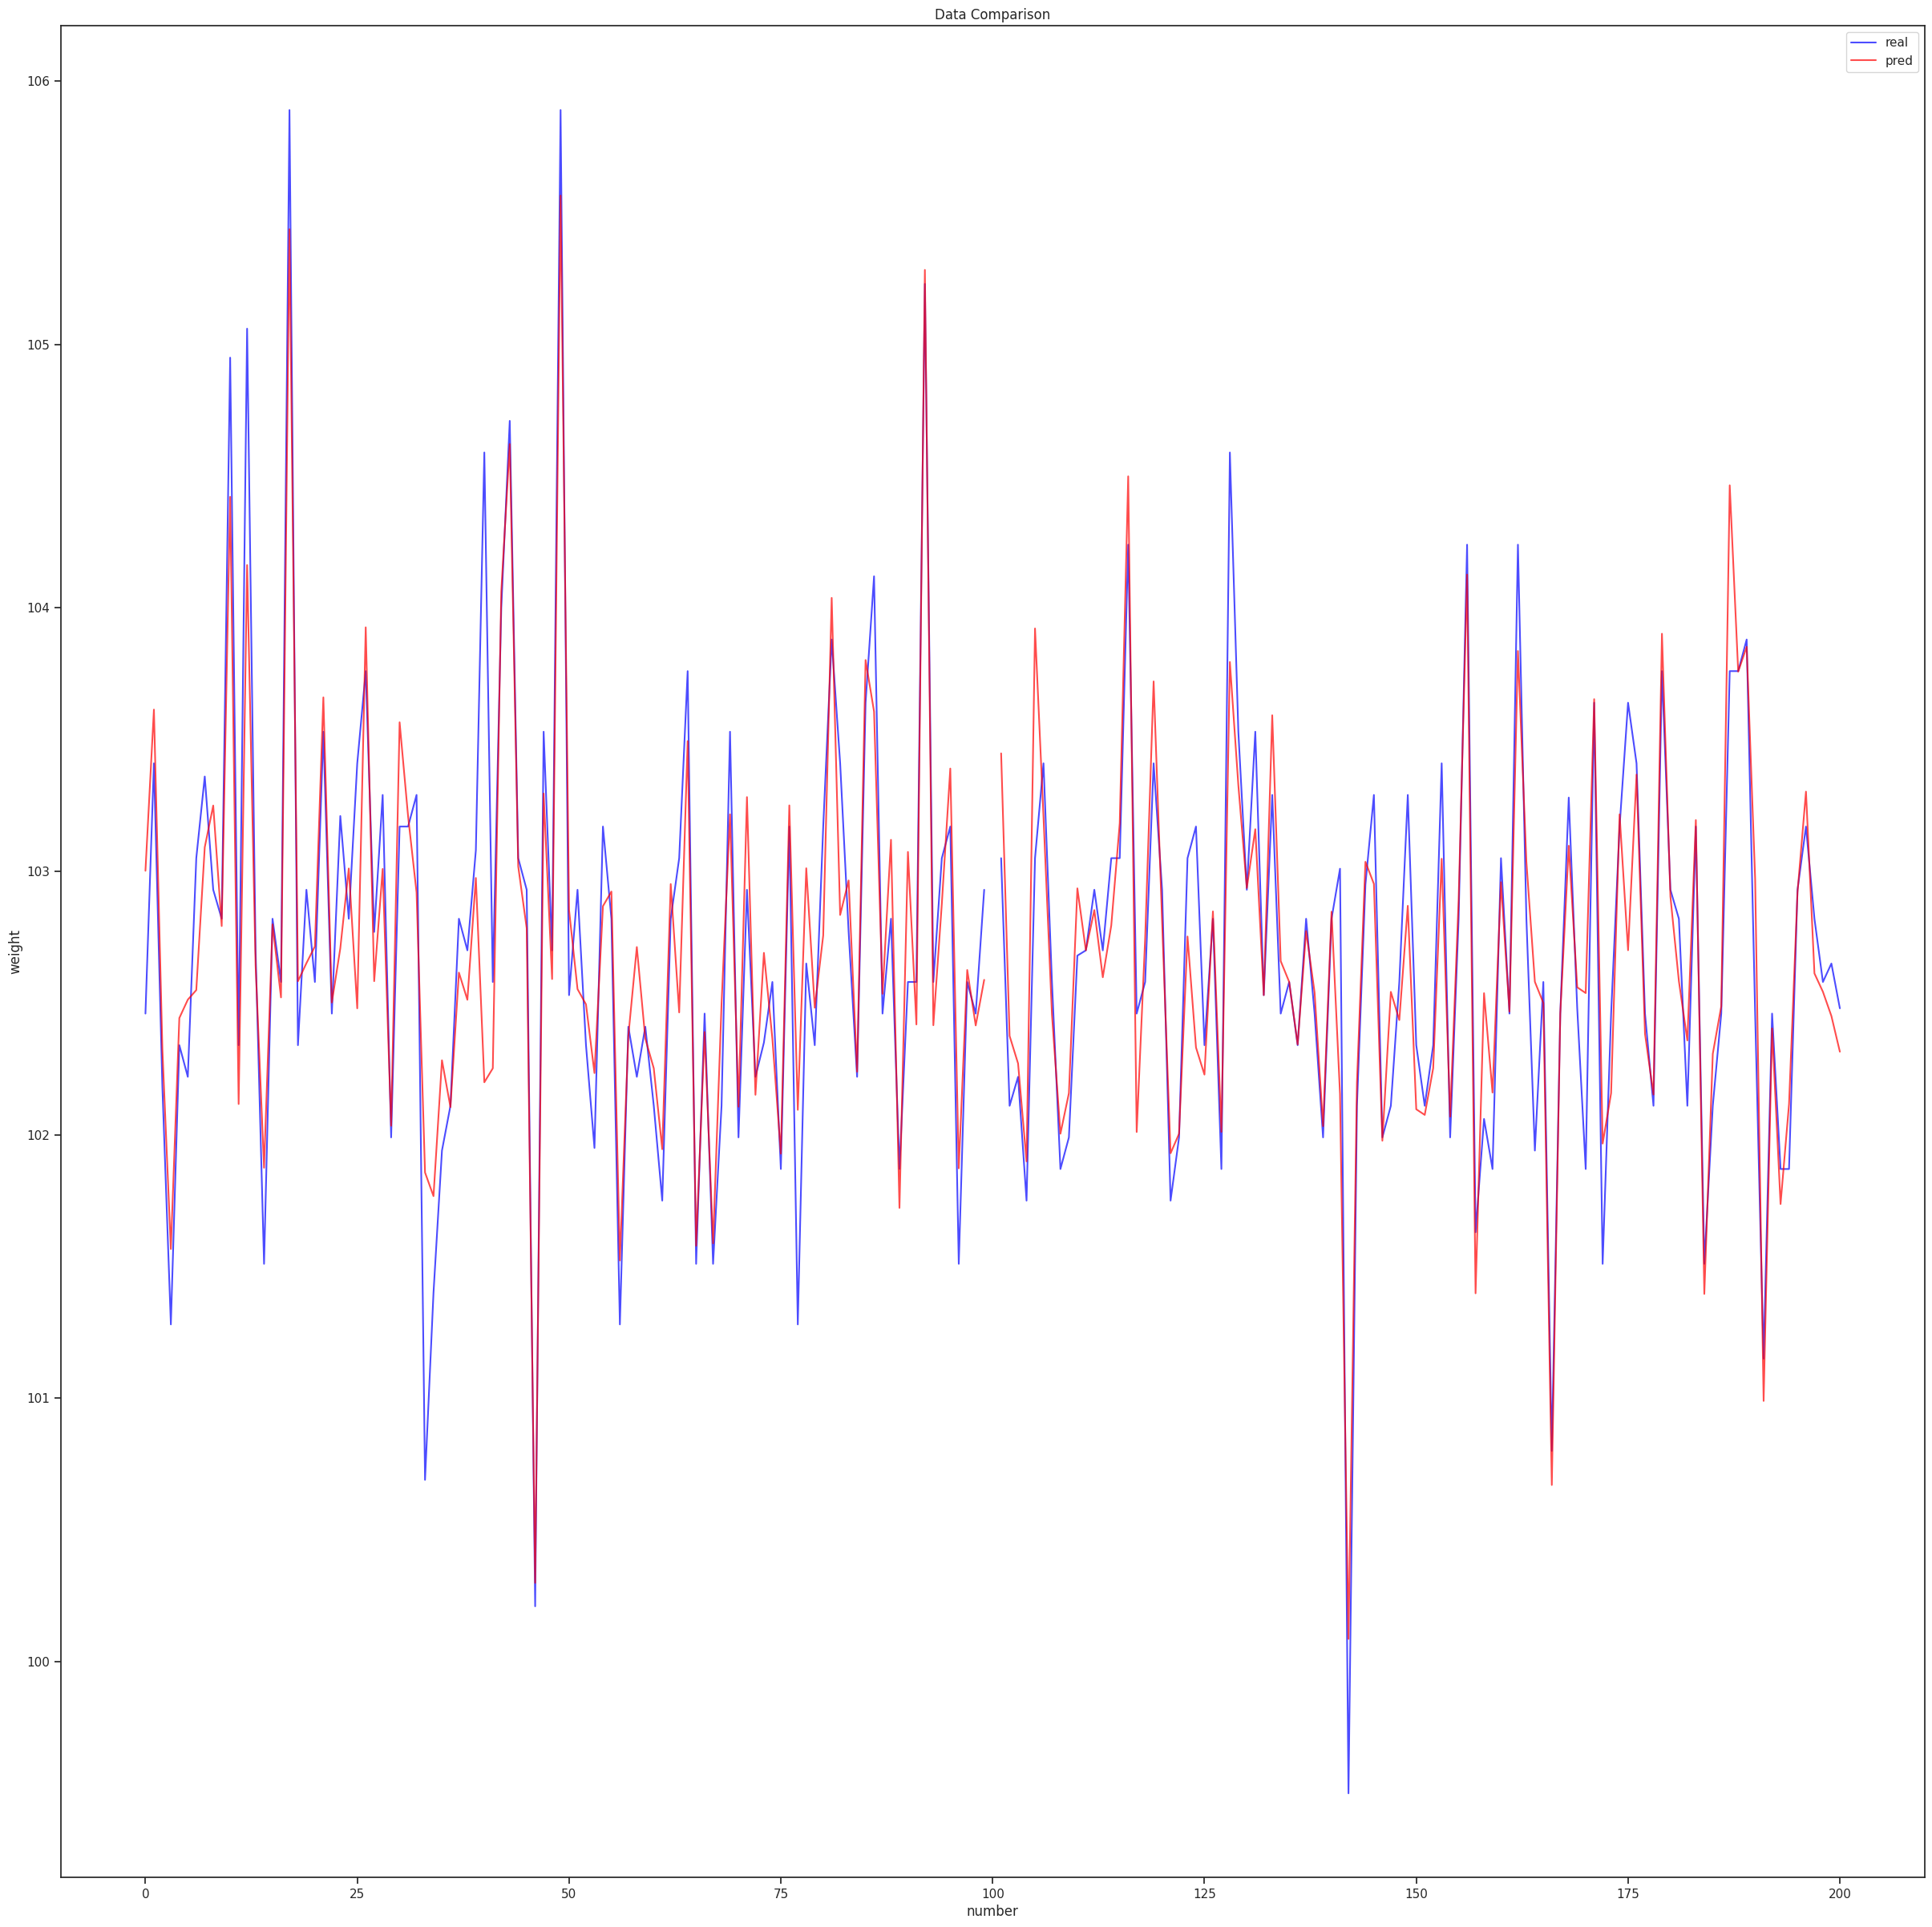

In [112]:
import matplotlib.pyplot as plt

# 顯示的數量
num = 200

# 繪製第一組數據 y
plt.plot(merged_df.loc[:num, 'True'], label='real', color='blue', alpha=0.7, linestyle='-')

# 繪製第二組數據 allpred
plt.plot(merged_df.loc[:num, 'Predicted'], label='pred', color='red', alpha=0.7, linestyle='-')


# 添加標題和標籤
plt.title('Data Comparison')
plt.xlabel('number')
plt.ylabel('weight')

# 添加圖例，放置在最佳位置
plt.legend(loc='best')

# 顯示圖表
plt.show()


In [111]:
# import joblib

# joblib.dump(best_rf_model, 'random_forest_weight.pkl')

['random_forest_weight.pkl']

In [1]:
import joblib

model = joblib.load('random_forest_weight.pkl')

In [46]:
import itertools

# 當前的參數值
a = 10
b = 20

# 定義步長
step_a = 0.1
step_b = 0.2

# 生成九宮格
grid_values = []
for da, db in itertools.product([-step_a, 0, step_a], [-step_b, 0, step_b]):
    grid_values.append((a + da, b + db))

# 列印九宮格
for i, (a_val, b_val) in enumerate(grid_values):
    print(f"Value {i+1}: ({a_val}, {b_val})")


Value 1: (9.9, 19.8)
Value 2: (9.9, 20)
Value 3: (9.9, 20.2)
Value 4: (10, 19.8)
Value 5: (10, 20)
Value 6: (10, 20.2)
Value 7: (10.1, 19.8)
Value 8: (10.1, 20)
Value 9: (10.1, 20.2)


In [45]:
import itertools

# 當前的參數值
a = 10
b = 20
c = 30

# 定義步長
step_a = 0.1
step_b = 0.2
step_c = 0.3

# 生成九宮格
grid_values = []
for da, db, dc in itertools.product([-step_a, 0, step_a], [-step_b, 0, step_b], [-step_c, 0, step_c]):
    grid_values.append((a + da, b + db, c + dc))

# 列印九宮格
for i, (a_val, b_val, c_val) in enumerate(grid_values):
    print(f"Value {i+1}: ({a_val}, {b_val}, {c_val})")


Value 1: (9.9, 19.8, 29.7)
Value 2: (9.9, 19.8, 30)
Value 3: (9.9, 19.8, 30.3)
Value 4: (9.9, 20, 29.7)
Value 5: (9.9, 20, 30)
Value 6: (9.9, 20, 30.3)
Value 7: (9.9, 20.2, 29.7)
Value 8: (9.9, 20.2, 30)
Value 9: (9.9, 20.2, 30.3)
Value 10: (10, 19.8, 29.7)
Value 11: (10, 19.8, 30)
Value 12: (10, 19.8, 30.3)
Value 13: (10, 20, 29.7)
Value 14: (10, 20, 30)
Value 15: (10, 20, 30.3)
Value 16: (10, 20.2, 29.7)
Value 17: (10, 20.2, 30)
Value 18: (10, 20.2, 30.3)
Value 19: (10.1, 19.8, 29.7)
Value 20: (10.1, 19.8, 30)
Value 21: (10.1, 19.8, 30.3)
Value 22: (10.1, 20, 29.7)
Value 23: (10.1, 20, 30)
Value 24: (10.1, 20, 30.3)
Value 25: (10.1, 20.2, 29.7)
Value 26: (10.1, 20.2, 30)
Value 27: (10.1, 20.2, 30.3)


In [285]:
y_real = np.array(y_test)

In [286]:
# len(y_test), len(y_pred)
y_pred

array([4351.3945, 6964.0376, 4284.8374, ..., 4310.0034, 7649.422 ,
       4338.7715], dtype=float32)

In [287]:
y_real

array([4350., 7595., 4410., ..., 4315., 7750., 4340.])

In [293]:
r_squared_all = r2_score(y, all_pred)
r_squared_all

0.9679098382457488

# 驗證

In [72]:
df_nona.tail()

,pull,main,supply,main_torque,supply_torque,vacuum,weight%,weight,weight_sv
754737,860.0,43.599998,31.5,51.900002,55.400002,120.0,101.010002,7575.0,7874.0
754738,860.0,43.599998,31.5,51.799999,55.400002,119.0,101.010002,7560.0,7874.0
754739,860.0,43.599998,31.5,51.799999,55.400002,127.0,100.809998,7560.0,7874.0
754740,860.0,43.599998,31.5,51.900002,55.400002,127.0,100.809998,7560.0,7874.0
754741,860.0,43.599998,31.5,51.900002,55.400002,118.0,100.809998,7560.0,7874.0


In [83]:
df_nona.shape

(577796, 9)

In [124]:
test = df_nona.iloc[-200000: -199950, :]
test.shape

(50, 9)

In [125]:
test

,pull,main,supply,main_torque,supply_torque,vacuum,weight%,weight,weight_sv
547517,1508.0,52.200001,25.1,54.5,55.799999,421.0,102.529999,4335.0,4439.0
547518,1508.0,52.200001,25.1,54.5,55.799999,421.0,102.529999,4335.0,4439.0
547519,1508.0,52.200001,25.1,54.5,55.799999,421.0,102.529999,4335.0,4439.0
547520,1508.0,52.200001,25.1,54.5,55.799999,421.0,102.529999,4335.0,4439.0
547521,1508.0,52.200001,25.1,54.5,55.799999,421.0,102.529999,4335.0,4439.0
547522,1508.0,52.200001,25.1,54.5,55.799999,421.0,102.529999,4335.0,4439.0
547523,1508.0,52.200001,25.1,54.5,55.799999,421.0,102.529999,4335.0,4439.0
547524,1508.0,52.200001,25.1,54.5,55.799999,421.0,102.529999,4335.0,4439.0
547525,1508.0,52.200001,25.1,54.5,55.799999,421.0,102.529999,4335.0,4439.0
547526,1508.0,52.200001,25.1,54.5,55.799999,421.0,102.529999,4335.0,4439.0


In [126]:
t_x = test.drop(['weight%', 'weight', 'weight_sv'], axis=1)
t_y = test['weight']
t_x.shape, t_y.shape

((50, 6), (50,))

In [127]:
scaler = RobustScaler()
t_x_scaled = scaler.fit_transform(t_x)

In [128]:
result = best_model.predict(t_x_scaled)

In [129]:
result

array([4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445,
       4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445,
       4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445,
       4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445,
       4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445,
       4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445,
       4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445,
       4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445, 4342.6445,
       4342.6445, 4342.6445], dtype=float32)